# Cargar librerias

In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.linalg as ln
import glob as glob
from datetime import datetime
from datetime import timedelta
from scipy.signal import argrelextrema
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.ticker as ticker
from scipy import interpolate


# plt.style.use("default")
# from ipyparallel import Client
# rc = Client()



CPU times: user 1.32 s, sys: 229 ms, total: 1.54 s
Wall time: 6.19 s


# Unir archivos

## VF1

In [3]:
%%time
# level1_path = []
# level2_path = []
# level3_path = []
# level4_path = []
# level5_path = []
# level6_path = []
# level7_path = []

path = glob.glob(r'/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_raw_datasets/level_7/*.txt')

# for i in range(1,8):
#     path = glob.glob(r'/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_raw_datasets/level_'\
#                      +str(i)+'/*.txt')
#     if i == 1:
#         level1_path=path
#     elif i == 2:
#         level2_path=path
#     elif i == 3:
#         level3_path=path
#     elif i == 4:
#         level4_path=path
#     elif i == 5:
#         level5_path=path
#     elif i == 6:
#         level6_path=path
#     else:
#         level7_path=path
        

# date = pd.date_range("2019-12-27 00:00:00", "2020-01-03 03:00:00", freq = '0.5H')

CPU times: user 3.91 ms, sys: 0 ns, total: 3.91 ms
Wall time: 1.17 s


In [4]:
path

['/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_raw_datasets/level_7/20191230-2100_raw_dataset_2020-01-28T113027_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_raw_datasets/level_7/20191227-0100_raw_dataset_2020-01-28T110226_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_raw_datasets/level_7/20191227-0130_raw_dataset_2020-01-28T110226_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_raw_datasets/level_7/20191227-0200_raw_dataset_2020-01-28T110226_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_raw_datasets/level_7/20191227-0230_raw_dataset_2020-01-28T110226_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Goog

In [4]:
%%time
date_list_correct = [datetime(2019,12,27,0,0,0)+ timedelta(minutes = i) for i in range(0,60*24*8,30)]
date_correct = []
for i in date_list_correct:
    d = i.strftime('%Y%m%d-%H%M')
    date_correct.append(d)

CPU times: user 4.4 ms, sys: 86 µs, total: 4.49 ms
Wall time: 3.81 ms


In [5]:
date_correct

['20191227-0000',
 '20191227-0030',
 '20191227-0100',
 '20191227-0130',
 '20191227-0200',
 '20191227-0230',
 '20191227-0300',
 '20191227-0330',
 '20191227-0400',
 '20191227-0430',
 '20191227-0500',
 '20191227-0530',
 '20191227-0600',
 '20191227-0630',
 '20191227-0700',
 '20191227-0730',
 '20191227-0800',
 '20191227-0830',
 '20191227-0900',
 '20191227-0930',
 '20191227-1000',
 '20191227-1030',
 '20191227-1100',
 '20191227-1130',
 '20191227-1200',
 '20191227-1230',
 '20191227-1300',
 '20191227-1330',
 '20191227-1400',
 '20191227-1430',
 '20191227-1500',
 '20191227-1530',
 '20191227-1600',
 '20191227-1630',
 '20191227-1700',
 '20191227-1730',
 '20191227-1800',
 '20191227-1830',
 '20191227-1900',
 '20191227-1930',
 '20191227-2000',
 '20191227-2030',
 '20191227-2100',
 '20191227-2130',
 '20191227-2200',
 '20191227-2230',
 '20191227-2300',
 '20191227-2330',
 '20191228-0000',
 '20191228-0030',
 '20191228-0100',
 '20191228-0130',
 '20191228-0200',
 '20191228-0230',
 '20191228-0300',
 '20191228

In [7]:
%%time
# def CortarPath(path):
#     path_slice = []
#     for j in path:
#         h = j[-51:-38]
#         path_slice.append(h)
#     return path_slice

path_slice = []
for j in path:
    h = j[-51:-38]
    path_slice.append(h)

# path_slice1 = CortarPath(level1_path)
# path_slice2 = CortarPath(level2_path)
# path_slice3 = CortarPath(level3_path)
# path_slice4 = CortarPath(level4_path)
# path_slice5 = CortarPath(level5_path)
# path_slice6 = CortarPath(level6_path)
# path_slice7 = CortarPath(level7_path)

CPU times: user 68 µs, sys: 18 µs, total: 86 µs
Wall time: 88.9 µs


In [8]:
path_slice

['20191230-2100',
 '20191227-0100',
 '20191227-0130',
 '20191227-0200',
 '20191227-0230',
 '20191227-0300',
 '20191227-0330',
 '20191227-0400',
 '20191227-0430',
 '20191227-0500',
 '20191230-0930',
 '20191230-1000',
 '20191230-1030',
 '20191230-1100',
 '20191230-1130',
 '20191230-1200',
 '20191230-1230',
 '20191230-1300',
 '20191230-1330',
 '20191230-1400',
 '20191230-1430',
 '20191230-1500',
 '20200102-1430',
 '20200102-1500',
 '20200102-1530',
 '20200102-1600',
 '20200102-1630',
 '20200102-1700',
 '20200102-1730',
 '20200102-1800',
 '20200102-1830',
 '20200102-1900',
 '20191227-0530',
 '20191227-1100',
 '20191227-1630',
 '20191228-0100',
 '20191228-0700',
 '20191228-1330',
 '20191228-1930',
 '20191229-0330',
 '20191229-1230',
 '20191230-0100',
 '20191230-0900',
 '20191230-1530',
 '20191229-1300',
 '20191229-1330',
 '20191229-1400',
 '20191229-1430',
 '20191229-1500',
 '20191229-1530',
 '20191229-1600',
 '20191229-1700',
 '20191229-1800',
 '20191229-1830',
 '20191229-1900',
 '20191229

In [9]:
# # Código base

# df = pd.DataFrame(columns=['u', 'v', 'w', 'ts', 'co2', 'h2o'])
# nan_inicio = [] #Contiene las posiciones del inicio de periodos donde no hay datos
# missing_path = [] #Fechas no encontradas para el nivel
# for j in range(len(date_correct)):
#     if date_correct[j] in path_slice and j < 3:
#         index = path_slice.index(date_correct[j])
# #         print('si ta', index)
#         ruta = path[index][0:-51]+date_correct[j]+path[index][-38:]
#         print(ruta)
#         temp = pd.read_csv(ruta, sep = '\s+', skiprows = 8, engine = 'python')
# #         print(temp)
#         l_temp = len(temp)
# #         print(l_temp)
#         if len(temp) < (20*30*60):
#             for k in range(len(temp),20*30*60):
#                 temp = temp.append({'u' : np.nan ,  'v': np.nan,\
#                                     'w': np.nan, 'ts': np.nan, 'co2': np.nan, 'h2o': np.nan} , ignore_index=True)
#         df = df.append(temp, ignore_index = True)
#         n = len(df)-(20*30*60-l_temp)
#         nan_inicio.append(n)
# #         print(n)
# #         print(df)
#     else:
# #         print('no ta',date_correct[j])
#         missing_path.append(date_correct[j])
# #     print(nan_inicio)

In [7]:
%%time

def DatosLevel(date_correct,path_slice,path):
    '''
    Input:
    - Fechas correctas de periodo de análisis
    - Fechas de los archivos
    - Vector de rutas de archivos
    
    Output:
    Retorna un dataframe con los datos a partir de las rutas.Las fechas no existentes o si existen valores 
    faltantes dentro de un archivos son llenadas con NaN 
    '''
    
    df = pd.DataFrame(columns=['u', 'v', 'w', 'ts', 'co2', 'h2o'])
    nan_inicio = [] #Contiene las posiciones del inicio de periodos donde no hay datos
    missing_path = [] #Fechas no encontradas para el nivel
    for j in range(len(date_correct)):
        print(len(df))
        if date_correct[j] in path_slice:
            index = path_slice.index(date_correct[j])
    #         print('si ta', index)
            ruta = path[index][0:-51]+date_correct[j]+path[index][-38:]
#             print(ruta)
            temp = pd.read_csv(ruta, sep = '\s+', skiprows = 8, engine = 'python')
#             print(temp)
            l_temp = len(temp)
    #         print(l_temp)
            if l_temp < (20*30*60): # 36000 datos, porque la resolución de muestro es 20Hz
                for k in range(l_temp,20*30*60): # Rellenar valores faltantes en una fecha con NaN
                    temp = temp.append({'u' : -9999 ,  'v': -9999,\
                                        'w': -9999, 'ts': -9999, 'co2': -9999, 'h2o': -9999} , ignore_index=True)
                print('Fecha: '+date_correct[j]+' con menos de 36000 datos')
            elif l_temp == 36000:
                print('Fecha: '+date_correct[j]+' con 36000 datos')
                
            else: #Fecha con 36000 datos completos
                print('Fecha: '+date_correct[j]+' con más de 36000 datos')
                temp = temp.iloc[:(20*30*60-l_temp+1),:]
#                 print(len(temp))
            df = df.append(temp, ignore_index = True)
            if l_temp < (20*30*60):
                n = len(df)-(20*30*60-l_temp)+1
                nan_inicio.append(n)
#             print(n)
    #         print(df)
        else:
            print('no está '+date_correct[j])
            missing_path.append(date_correct[j])
            temp = pd.DataFrame(np.ones([36000,6])*-9999, columns=['u', 'v', 'w', 'ts', 'co2', 'h2o'])
            df = df.append(temp, ignore_index = True)
    #     print(nan_inicio)
    return (df, nan_inicio, missing_path) 
# puede llevar nan_inicio, missing_path



CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


In [11]:
# %%time   #Generar un archivo con todos los datos juntos

df, nan_inicio, missing_path = DatosLevel(date_correct,path_slice, path)

# df1,nan_inicio1,missing_path1 = DatosLevel(date_correct,path_slice1, level1_path)
# df2,nan_inicio2,missing_path2 = DatosLevel(date_correct,path_slice2, level2_path)
# df3,nan_inicio3,missing_path3 = DatosLevel(date_correct,path_slice3, level3_path)
# df4,nan_inicio4,missing_path4 = DatosLevel(date_correct,path_slice4, level4_path)
# df5,nan_inicio5,missing_path5 = DatosLevel(date_correct,path_slice5, level5_path)
# df6,nan_inicio6,missing_path6 = DatosLevel(date_correct,path_slice6, level6_path)
# df7,nan_inicio7,missing_path7 = DatosLevel(date_correct,path_slice7, level7_path)

0
no está 20191227-0000
36000
no está 20191227-0030
72000
Fecha: 20191227-0100 con menos de 36000 datos
108000
Fecha: 20191227-0130 con menos de 36000 datos
144000
Fecha: 20191227-0200 con menos de 36000 datos
180000
Fecha: 20191227-0230 con menos de 36000 datos
216000
Fecha: 20191227-0300 con 36000 datos
252000
Fecha: 20191227-0330 con 36000 datos
288000
Fecha: 20191227-0400 con 36000 datos
324000
Fecha: 20191227-0430 con 36000 datos
360000
Fecha: 20191227-0500 con 36000 datos
396000
Fecha: 20191227-0530 con 36000 datos
432000
Fecha: 20191227-0600 con 36000 datos
468000
Fecha: 20191227-0630 con 36000 datos
504000
Fecha: 20191227-0700 con 36000 datos
540000
Fecha: 20191227-0730 con 36000 datos
576000
Fecha: 20191227-0800 con menos de 36000 datos
612000
Fecha: 20191227-0830 con 36000 datos
648000
Fecha: 20191227-0900 con 36000 datos
684000
Fecha: 20191227-0930 con 36000 datos
720000
Fecha: 20191227-1000 con 36000 datos
756000
Fecha: 20191227-1030 con 36000 datos
792000
Fecha: 20191227-1

Fecha: 20191230-1630 con 36000 datos
6408000
Fecha: 20191230-1700 con menos de 36000 datos
6444000
Fecha: 20191230-1730 con 36000 datos
6480000
Fecha: 20191230-1800 con 36000 datos
6516000
Fecha: 20191230-1830 con menos de 36000 datos
6552000
Fecha: 20191230-1900 con menos de 36000 datos
6588000
Fecha: 20191230-1930 con 36000 datos
6624000
Fecha: 20191230-2000 con 36000 datos
6660000
Fecha: 20191230-2030 con menos de 36000 datos
6696000
Fecha: 20191230-2100 con menos de 36000 datos
6732000
Fecha: 20191230-2130 con menos de 36000 datos
6768000
Fecha: 20191230-2200 con menos de 36000 datos
6804000
Fecha: 20191230-2230 con menos de 36000 datos
6840000
Fecha: 20191230-2300 con menos de 36000 datos
6876000
Fecha: 20191230-2330 con menos de 36000 datos
6912000
no está 20191231-0000
6948000
no está 20191231-0030
6984000
Fecha: 20191231-0100 con menos de 36000 datos
7020000
Fecha: 20191231-0130 con menos de 36000 datos
7056000
Fecha: 20191231-0200 con menos de 36000 datos
7092000
Fecha: 201912

12816000
no está 20200103-1000
12852000
no está 20200103-1030
12888000
no está 20200103-1100
12924000
no está 20200103-1130
12960000
no está 20200103-1200
12996000
no está 20200103-1230
13032000
no está 20200103-1300
13068000
no está 20200103-1330
13104000
no está 20200103-1400
13140000
no está 20200103-1430
13176000
no está 20200103-1500
13212000
no está 20200103-1530
13248000
no está 20200103-1600
13284000
no está 20200103-1630
13320000
no está 20200103-1700
13356000
no está 20200103-1730
13392000
no está 20200103-1800
13428000
no está 20200103-1830
13464000
no está 20200103-1900
13500000
no está 20200103-1930
13536000
no está 20200103-2000
13572000
no está 20200103-2030
13608000
no está 20200103-2100
13644000
no está 20200103-2130
13680000
no está 20200103-2200
13716000
no está 20200103-2230
13752000
no está 20200103-2300
13788000
no está 20200103-2330


In [12]:
df.shape

(13824000, 6)

In [13]:
df.iloc[72000:72100]

u         v         w        ts       co2       h2o
72000 -0.428066  0.138662 -0.003333  0.032442  0.002938  2.340840
72001 -0.175622  0.059396  0.086886  0.038118  0.015210  2.906880
72002 -0.586712  0.118841  0.114816  0.051302  0.010116  2.451253
72003 -0.490637  0.062765  0.199671  0.030641  0.012283  2.658284
72004 -0.483095  0.233313  0.085056  0.055574  0.010020  2.396870
...         ...       ...       ...       ...       ...       ...
72095 -0.961204  1.165841  0.256687  0.038057  0.031991  2.344746
72096 -1.160576  1.193953  0.116090  0.053285  0.027586  1.925191
72097 -1.035964  1.089396  0.177466  0.077730  0.028063  2.018941
72098 -1.075331  0.953390  0.468738  0.028810  0.022339  2.060017
72099 -1.161287  0.998116  0.566495  0.044557  0.033740  2.117207

[100 rows x 6 columns]

In [14]:
df.to_csv(r'VF1.txt', header=True, index=None, sep=' ', mode='a') #Guardar archivo de datos
print(df.iloc[0:72000,0])

0       -9999.0
1       -9999.0
2       -9999.0
3       -9999.0
4       -9999.0
          ...  
71995   -9999.0
71996   -9999.0
71997   -9999.0
71998   -9999.0
71999   -9999.0
Name: u, Length: 72000, dtype: float64


## EH1

In [8]:
path = glob.glob(r'/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/EH1/eddypro_raw_datasets/level_7/*.txt')
path

['/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/EH1/eddypro_raw_datasets/level_7/20191231-0700_raw_dataset_2020-01-28T142604_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/EH1/eddypro_raw_datasets/level_7/20191227-0030_raw_dataset_2020-01-28T140702_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/EH1/eddypro_raw_datasets/level_7/20191227-0100_raw_dataset_2020-01-28T140702_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/EH1/eddypro_raw_datasets/level_7/20191227-0130_raw_dataset_2020-01-28T140702_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/EH1/eddypro_raw_datasets/level_7/20191227-0200_raw_dataset_2020-01-28T140702_adv.txt',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Goog

In [9]:
path_slice = []
for j in path:
    h = j[-51:-38]
    path_slice.append(h)

In [10]:
df, nan_inicio, missing_path = DatosLevel(date_correct,path_slice, path)

0
no está 20191227-0000
36000
Fecha: 20191227-0030 con menos de 36000 datos
72000
Fecha: 20191227-0100 con 36000 datos
108000
Fecha: 20191227-0130 con 36000 datos
144000
Fecha: 20191227-0200 con 36000 datos
180000
Fecha: 20191227-0230 con 36000 datos
216000
Fecha: 20191227-0300 con 36000 datos
252000
Fecha: 20191227-0330 con 36000 datos
288000
Fecha: 20191227-0400 con 36000 datos
324000
Fecha: 20191227-0430 con 36000 datos
360000
Fecha: 20191227-0500 con 36000 datos
396000
Fecha: 20191227-0530 con 36000 datos
432000
Fecha: 20191227-0600 con 36000 datos
468000
Fecha: 20191227-0630 con 36000 datos
504000
Fecha: 20191227-0700 con 36000 datos
540000
Fecha: 20191227-0730 con 36000 datos
576000
Fecha: 20191227-0800 con 36000 datos
612000
Fecha: 20191227-0830 con 36000 datos
648000
Fecha: 20191227-0900 con 36000 datos
684000
Fecha: 20191227-0930 con 36000 datos
720000
Fecha: 20191227-1000 con 36000 datos
756000
Fecha: 20191227-1030 con 36000 datos
792000
Fecha: 20191227-1100 con 36000 datos
8

Fecha: 20191230-2030 con 36000 datos
6696000
Fecha: 20191230-2100 con 36000 datos
6732000
Fecha: 20191230-2130 con 36000 datos
6768000
Fecha: 20191230-2200 con 36000 datos
6804000
Fecha: 20191230-2230 con 36000 datos
6840000
Fecha: 20191230-2300 con 36000 datos
6876000
Fecha: 20191230-2330 con 36000 datos
6912000
no está 20191231-0000
6948000
Fecha: 20191231-0030 con menos de 36000 datos
6984000
Fecha: 20191231-0100 con 36000 datos
7020000
Fecha: 20191231-0130 con 36000 datos
7056000
Fecha: 20191231-0200 con 36000 datos
7092000
Fecha: 20191231-0230 con 36000 datos
7128000
Fecha: 20191231-0300 con 36000 datos
7164000
Fecha: 20191231-0330 con 36000 datos
7200000
Fecha: 20191231-0400 con 36000 datos
7236000
Fecha: 20191231-0430 con 36000 datos
7272000
Fecha: 20191231-0500 con 36000 datos
7308000
Fecha: 20191231-0530 con 36000 datos
7344000
Fecha: 20191231-0600 con 36000 datos
7380000
Fecha: 20191231-0630 con 36000 datos
7416000
Fecha: 20191231-0700 con 36000 datos
7452000
Fecha: 20191231-

Fecha: 20200103-1600 con 36000 datos
13284000
Fecha: 20200103-1630 con 36000 datos
13320000
Fecha: 20200103-1700 con 36000 datos
13356000
Fecha: 20200103-1730 con 36000 datos
13392000
Fecha: 20200103-1800 con 36000 datos
13428000
Fecha: 20200103-1830 con 36000 datos
13464000
Fecha: 20200103-1900 con 36000 datos
13500000
Fecha: 20200103-1930 con 36000 datos
13536000
Fecha: 20200103-2000 con 36000 datos
13572000
Fecha: 20200103-2030 con 36000 datos
13608000
Fecha: 20200103-2100 con 36000 datos
13644000
Fecha: 20200103-2130 con 36000 datos
13680000
Fecha: 20200103-2200 con 36000 datos
13716000
Fecha: 20200103-2230 con 36000 datos
13752000
Fecha: 20200103-2300 con 36000 datos
13788000
Fecha: 20200103-2330 con 36000 datos


In [12]:
df.shape

(13824000, 6)

In [11]:
df.to_csv(r'EH1.txt', header=True, index=None, sep=' ', mode='a') #Guardar archivo de datos
print(df.iloc[:,0])

0          -9999.000000
1          -9999.000000
2          -9999.000000
3          -9999.000000
4          -9999.000000
               ...     
13823995      -1.683329
13823996      -1.674583
13823997      -1.750542
13823998      -1.800648
13823999      -1.827916
Name: u, Length: 13824000, dtype: float64


## EH2

In [8]:
path = glob.glob(r'/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/EH2/eddypro_raw_datasets/level_7/*.txt')

   
path_slice = []
for j in path:
    h = j[-51:-38]
    path_slice.append(h)
    
df, nan_inicio, missing_path = DatosLevel(date_correct,path_slice, path)
print(df.shape)

df.to_csv(r'EH2.txt', header=True, index=None, sep=' ', mode='a') #Guardar archivo de datos
print(df.iloc[:,0])

0
no está 20191227-0000
36000
Fecha: 20191227-0030 con menos de 36000 datos
72000
Fecha: 20191227-0100 con 36000 datos
108000
Fecha: 20191227-0130 con 36000 datos
144000
Fecha: 20191227-0200 con 36000 datos
180000
Fecha: 20191227-0230 con 36000 datos
216000
Fecha: 20191227-0300 con 36000 datos
252000
Fecha: 20191227-0330 con 36000 datos
288000
Fecha: 20191227-0400 con 36000 datos
324000
Fecha: 20191227-0430 con 36000 datos
360000
Fecha: 20191227-0500 con 36000 datos
396000
Fecha: 20191227-0530 con 36000 datos
432000
Fecha: 20191227-0600 con 36000 datos
468000
Fecha: 20191227-0630 con 36000 datos
504000
Fecha: 20191227-0700 con 36000 datos
540000
Fecha: 20191227-0730 con 36000 datos
576000
Fecha: 20191227-0800 con 36000 datos
612000
Fecha: 20191227-0830 con 36000 datos
648000
Fecha: 20191227-0900 con 36000 datos
684000
Fecha: 20191227-0930 con 36000 datos
720000
Fecha: 20191227-1000 con 36000 datos
756000
Fecha: 20191227-1030 con 36000 datos
792000
Fecha: 20191227-1100 con 36000 datos
8

Fecha: 20191230-2000 con 36000 datos
6660000
Fecha: 20191230-2030 con 36000 datos
6696000
Fecha: 20191230-2100 con 36000 datos
6732000
Fecha: 20191230-2130 con 36000 datos
6768000
Fecha: 20191230-2200 con 36000 datos
6804000
Fecha: 20191230-2230 con 36000 datos
6840000
Fecha: 20191230-2300 con 36000 datos
6876000
Fecha: 20191230-2330 con 36000 datos
6912000
no está 20191231-0000
6948000
Fecha: 20191231-0030 con menos de 36000 datos
6984000
Fecha: 20191231-0100 con 36000 datos
7020000
Fecha: 20191231-0130 con 36000 datos
7056000
Fecha: 20191231-0200 con 36000 datos
7092000
Fecha: 20191231-0230 con 36000 datos
7128000
Fecha: 20191231-0300 con 36000 datos
7164000
Fecha: 20191231-0330 con 36000 datos
7200000
Fecha: 20191231-0400 con 36000 datos
7236000
Fecha: 20191231-0430 con 36000 datos
7272000
Fecha: 20191231-0500 con 36000 datos
7308000
Fecha: 20191231-0530 con 36000 datos
7344000
Fecha: 20191231-0600 con 36000 datos
7380000
Fecha: 20191231-0630 con 36000 datos
7416000
Fecha: 20191231-

Fecha: 20200103-1430 con 36000 datos
13176000
Fecha: 20200103-1500 con 36000 datos
13212000
Fecha: 20200103-1530 con 36000 datos
13248000
Fecha: 20200103-1600 con 36000 datos
13284000
Fecha: 20200103-1630 con 36000 datos
13320000
Fecha: 20200103-1700 con 36000 datos
13356000
Fecha: 20200103-1730 con 36000 datos
13392000
Fecha: 20200103-1800 con 36000 datos
13428000
Fecha: 20200103-1830 con 36000 datos
13464000
Fecha: 20200103-1900 con 36000 datos
13500000
Fecha: 20200103-1930 con 36000 datos
13536000
Fecha: 20200103-2000 con 36000 datos
13572000
Fecha: 20200103-2030 con 36000 datos
13608000
Fecha: 20200103-2100 con 36000 datos
13644000
Fecha: 20200103-2130 con 36000 datos
13680000
Fecha: 20200103-2200 con 36000 datos
13716000
Fecha: 20200103-2230 con 36000 datos
13752000
Fecha: 20200103-2300 con 36000 datos
13788000
Fecha: 20200103-2330 con 36000 datos
(13824000, 6)
0          -9999.000000
1          -9999.000000
2          -9999.000000
3          -9999.000000
4          -9999.000000
 

# Lectura de archivos con datos unidos VF1

In [2]:
#Lectura del archivos unidos para el nivel 1(datos crudos) y nivel 7(máximo procesamiento)
data = pd.read_csv('VF1.txt', sep = '\s+')  
# # data_raw = pd.read_csv('VF1_rawData.txt', sep = '\s+')
print(len(data))
# data_raw.iloc[:72001,:]

13824000


In [3]:
# Fechas para graficar
date = pd.date_range('2019-12-27 00:00:00', periods = 13824000, freq = '0.05S')
date

DatetimeIndex([       '2019-12-27 00:00:00', '2019-12-27 00:00:00.050000',
               '2019-12-27 00:00:00.100000', '2019-12-27 00:00:00.150000',
               '2019-12-27 00:00:00.200000', '2019-12-27 00:00:00.250000',
               '2019-12-27 00:00:00.300000', '2019-12-27 00:00:00.350000',
               '2019-12-27 00:00:00.400000', '2019-12-27 00:00:00.450000',
               ...
               '2020-01-03 23:59:59.500000', '2020-01-03 23:59:59.550000',
               '2020-01-03 23:59:59.600000', '2020-01-03 23:59:59.650000',
               '2020-01-03 23:59:59.700000', '2020-01-03 23:59:59.750000',
               '2020-01-03 23:59:59.800000', '2020-01-03 23:59:59.850000',
               '2020-01-03 23:59:59.900000', '2020-01-03 23:59:59.950000'],
              dtype='datetime64[ns]', length=13824000, freq='50L')

In [4]:
data = np.asarray(data)
# data_raw = np.asarray(data_raw)

u = data[:,0]
v = data[:,1]
w = data[:,2]
t = data[:,3]
q = data[:,5]

# u_raw = data_raw[:,0]
# v_raw = data_raw[:,1]
# w_raw = data_raw[:,2]
# t_raw = data_raw[:,3]
# q_raw = data_raw[:,5]

pos_faltante_u = np.where(u == -9999)[0]
pos_faltante_v = np.where(v == -9999)[0]
pos_faltante_w = np.where(w == -9999)[0]
pos_faltante_t = np.where(t == -9999)[0]
pos_faltante_q = np.where(q == -9999)[0]

# pos_faltante_u_raw = np.where(u_raw == -9999)[0]
# pos_faltante_v_raw = np.where(v_raw == -9999)[0]
# pos_faltante_w_raw = np.where(w_raw == -9999)[0]
# pos_faltante_t_raw = np.where(t_raw == -9999)[0]
# pos_faltante_q_raw = np.where(q_raw == -9999)[0]

u[pos_faltante_u] = np.nan
v[pos_faltante_v] = np.nan
w[pos_faltante_w] = np.nan
t[pos_faltante_t] = np.nan
q[pos_faltante_q] = np.nan

# u_raw[pos_faltante_u_raw] = np.nan
# v_raw[pos_faltante_v_raw] = np.nan
# w_raw[pos_faltante_w_raw] = np.nan
# t_raw[pos_faltante_t_raw] = np.nan
# q_raw[pos_faltante_q_raw] = np.nan


print(data.shape)


(13824000, 6)


## Series de anomalías de U,V, W, T y q

In [6]:
ruta = '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/VF1/'
ruta

'/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/VF1/'

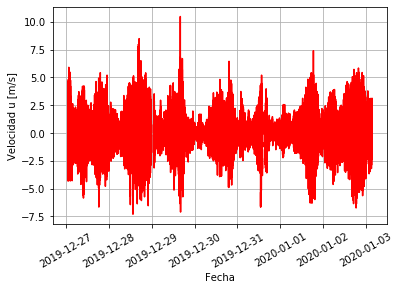

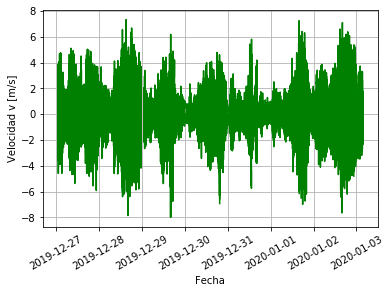

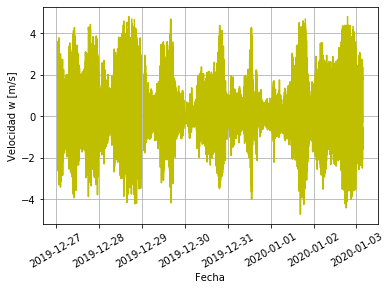

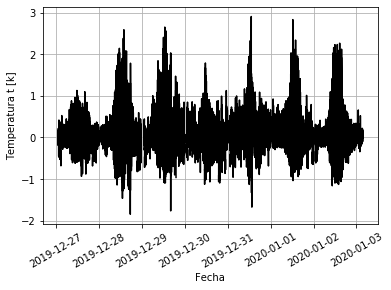

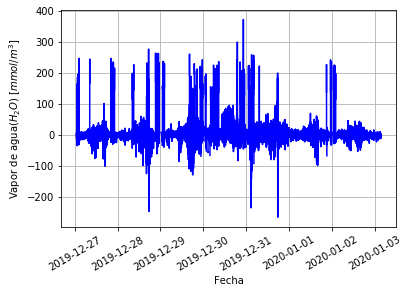

In [13]:
# Series de U,V,W,T y q;
plt.figure()
plt.plot(date,u, c = 'r')
plt.ylabel ('Velocidad u [m/s]')
plt.xlabel('Fecha') 
plt.xticks(rotation = 30)
plt.grid()
# plt.savefig(ruta+'Vel_u.png',dpi=700,bbox_inches='tight')

plt.figure()
plt.plot(date,v, c = 'g')
plt.ylabel ('Velocidad v [m/s]')
plt.xlabel('Fecha') 
plt.xticks(rotation = 30)
plt.grid()
# plt.savefig(ruta+'Vel_v.png',dpi=700,bbox_inches='tight')


plt.figure()
plt.plot(date,w, c = 'y')
plt.ylabel ('Velocidad w [m/s]')
plt.xlabel('Fecha') 
plt.xticks(rotation = 30)
plt.grid()
# plt.savefig(ruta+'Vel_w.png',dpi=700,bbox_inches='tight')


plt.figure()
plt.plot(date,t, c = 'k')
plt.ylabel ('Temperatura t [k]')
plt.xlabel('Fecha')
# plt.title('Fluctuaciones T')
plt.xticks(rotation = 30)
plt.grid()
# plt.savefig(ruta+'Temperatura.png',dpi=700,bbox_inches='tight')


plt.figure()
plt.plot(date,q, c = 'b')
plt.ylabel ('Vapor de agua($H_{2}O$) [$mmol/m^{3}$]')
plt.xlabel('Fecha')
# plt.title('Fluctuaciones de $H_{2}O$')
plt.xticks(rotation = 30)
plt.grid()
# plt.xlim(72000,106304)
# plt.savefig(ruta+'Humedad.png',dpi=700,bbox_inches='tight')


In [7]:
print(np.nanmean(u), np.nanmean(v), np.nanmean(w), np.nanmean(t), np.nanmean(q))

-1.7312007403437926e-15 -7.0699718104420694e-15 1.196803099318025e-15 3.6434891787725995e-16 -7.889165061373244e-14


# Flujos turbulentos

## Flujo de momento M, calor sensible H y calor latente LE

In [5]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["PROJ_LIB"] = "C:\\Users\\USUARIO\\Anaconda3\\Library\\share"; #fixr


import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from pybrain.datasets import SupervisedDataSet,UnsupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer, SigmoidLayer, LinearLayer
from pybrain.tools.customxml import NetworkWriter
from pybrain.tools.customxml import NetworkReader

import csv
import datetime as dt
import scipy.stats as ss

In [6]:
paths_fluxes = glob.glob(r"/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_*.csv")
paths_fluxes

['/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T110226_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T112223_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T112628_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T113027_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T113436_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T113821_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/

In [7]:
paths_fluxes = paths_fluxes[0:7] #Descartando el último día por solo tener tres mediciones
paths_fluxes

['/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T110226_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T112223_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T112628_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T113027_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T113436_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_VF1_full_output_2020-01-28T113821_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/

In [8]:
#Estructura de archivos cargados
paths_fluxes[0]
df = pd.read_csv(paths_fluxes[1], sep = ',', header = 1)
df = df.drop([0],axis=0)
print(list(df))
df.head(3)

['filename', 'date', 'time', 'DOY', 'daytime', 'file_records', 'used_records', 'Tau', 'qc_Tau', 'H', 'qc_H', 'LE', 'qc_LE', 'co2_flux', 'qc_co2_flux', 'h2o_flux', 'qc_h2o_flux', 'H_strg', 'LE_strg', 'co2_strg', 'h2o_strg', 'co2_v-adv', 'h2o_v-adv', 'co2_molar_density', 'co2_mole_fraction', 'co2_mixing_ratio', 'co2_time_lag', 'co2_def_timelag', 'h2o_molar_density', 'h2o_mole_fraction', 'h2o_mixing_ratio', 'h2o_time_lag', 'h2o_def_timelag', 'sonic_temperature', 'air_temperature', 'air_pressure', 'air_density', 'air_heat_capacity', 'air_molar_volume', 'ET', 'water_vapor_density', 'e', 'es', 'specific_humidity', 'RH', 'VPD', 'Tdew', 'u_unrot', 'v_unrot', 'w_unrot', 'u_rot', 'v_rot', 'w_rot', 'wind_speed', 'max_wind_speed', 'wind_dir', 'yaw', 'pitch', 'roll', 'u*', 'TKE', 'L', '(z-d)/L', 'bowen_ratio', 'T*', 'model', 'x_peak', 'x_offset', 'x_10%', 'x_30%', 'x_50%', 'x_70%', 'x_90%', 'un_Tau', 'Tau_scf', 'un_H', 'H_scf', 'un_LE', 'LE_scf', 'un_co2_flux', 'co2_scf', 'un_h2o_flux', 'h2o_scf', 

filename        date   time       DOY daytime file_records  \
1  VF1_2019-12-28_0004.csv  2019-12-28  01:00  362.0416       0        36000   
2  VF1_2019-12-28_0100.csv  2019-12-28  01:30  362.0624       0        36000   
3  VF1_2019-12-28_0130.csv  2019-12-28  02:00  362.0833       0        36000   

  used_records            Tau qc_Tau        H  ... h2o_spikes     u_var  \
1        36000      -0.268558      1  7.47556  ...         19  0.423348   
2        36000  -0.718750E-01      1  3.81442  ...         52  0.277239   
3        36000      -0.139027      0  9.02227  ...         22  0.546973   

      v_var     w_var        ts_var       co2_var  h2o_var      w/ts_cov  \
1   1.14704  0.236689  0.474441E-02  0.797510E-02  11.3916  0.815537E-02   
2  0.279977  0.174837  0.119415E-01  0.351177E-02  24.9200  0.455923E-02   
3  0.336155  0.194162  0.682527E-02  0.155674E-01  14.8750  0.933864E-02   

      w/co2_cov w/h2o_cov  
1  0.212950E-01  0.335310  
2  0.761685E-02  0.316828  
3  0.310345E-02  0.219846  

[3 rows x 110 columns]

In [9]:
M = [] # Flujo de momento [N*m^-2] Freq: 1 dato/30 min
H = [] # Flujo de calor sensible [W*m^-2] Freq: 1 dato/30 min
LE =[] # Flujo de calor Latente [W*m^-2] Freq: 1 dato/30 min
wind = [] #Velcidad del viento 
wind_dir = []
for j,i in enumerate(paths_fluxes):
    df = pd.read_csv(i, sep = ',', header = 1)
    df = df.drop([0],axis=0)
    Mi = np.array([float(p) for p in df['Tau'].values])
    Hi = np.array([float(p) for p in df['H'].values])
    LEi = np.array([float(p) for p in df['LE'].values])
    windi = np.array([float(p) for p in df['wind_speed'].values])
    wind_diri = np.array([float(p) for p in df['wind_dir'].values])
    hours = df.time.values
    if (Mi.shape[0]) < 48: # Llenar el flujo; M, H, LE con un nan
        hours_correct = [datetime.strptime(df.date.values[0], '%Y-%m-%d')+ timedelta(minutes = i) for i in range(0,60*24,30)]
        for k,m in enumerate(hours_correct):
            d = m.strftime('%H:%M')
            if d in hours:
                pass
            else:
                Mi = np.insert(Mi,k,np.nan)
                Hi = np.insert(Hi,k,np.nan)
                LEi = np.insert(LEi,k,np.nan)
                windi = np.insert(windi,k,np.nan)
                wind_diri = np.insert(wind_diri,k,np.nan)

            M.append(Mi[k])
            H.append(Hi[k])
            LE.append(LEi[k])
            wind.append(windi[k])
            wind_dir.append(wind_diri[k])

M = np.array(M)
H = np.array(H)
LE = np.array(LE)
wind = np.array(wind)
wind_dir = np.array(wind_dir)

In [10]:
ruta_fluxes = '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/VF1/FlujosTurbulentos/'

In [11]:
# Fechas para graficar con lapso de 30 min
date30 = pd.date_range('2019-12-27 00:00:00', periods =M.shape[0],freq='1800S')
date30.shape

(336,)

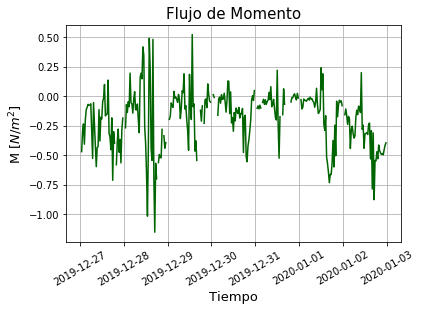

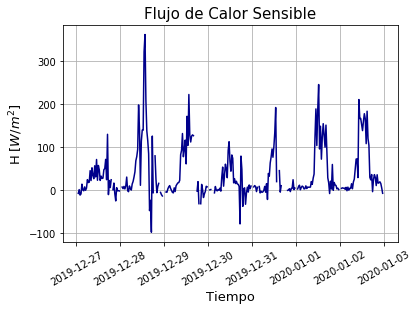

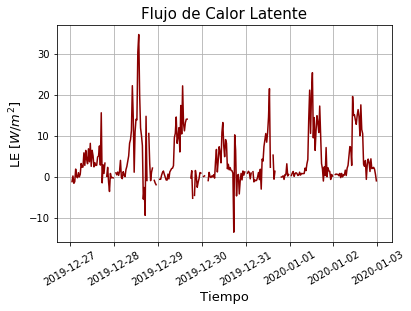

In [16]:
plt.figure()
plt.plot(date30,M,c='darkgreen')
plt.title('Flujo de Momento',size = 15)
plt.ylabel ("M [$N/m^{2}$]",size = 13)
plt.xlabel('Tiempo',size = 13)
plt.xticks(rotation = 30)
plt.grid()
# plt.savefig(ruta+'Flujo_M.png',dpi=800,bbox_inches='tight')


plt.figure()
plt.plot(date30,H,c='darkblue')
plt.title('Flujo de Calor Sensible',size = 15)
plt.ylabel ("H [$W/m^{2}$]",size = 13)
plt.xlabel('Tiempo',size = 13)
plt.xticks(rotation = 30)
plt.grid()
# plt.savefig(ruta+'Flujo_H.png',dpi=800,bbox_inches='tight')


plt.figure()
plt.plot(date30,LE,c='darkred')
plt.title('Flujo de Calor Latente',size = 15)
plt.ylabel ("LE [$W/m^{2}$]",size = 13)
plt.xlabel('Tiempo',size = 13)
plt.xticks(rotation = 30)
plt.grid()
# plt.savefig(ruta+'Flujo_LE.png',dpi=800,bbox_inches='tight')

## Velocidad media del viento y rosa de viento

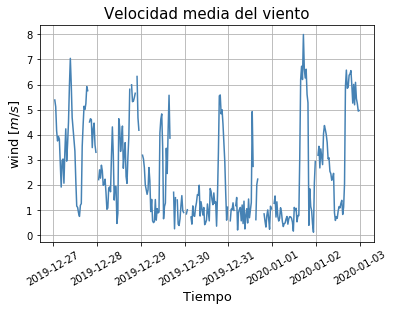

In [17]:
plt.figure()
plt.plot(date30,wind,c='steelblue')
plt.title('Velocidad media del viento',size = 15)
plt.ylabel ('wind [$m/s$]',size = 13)
plt.xlabel('Tiempo',size = 13)
plt.xticks(rotation = 30)
plt.grid()
# plt.savefig('ruta_fluxes+Velocidad_wind.png',dpi=800,bbox_inches='tight')

In [12]:
#Valores medios de las variables de entrada-----> Entonces son anomalías
print(np.nanmean(u), np.nanmean(v), np.nanmean(w), np.nanmean(t), np.nanmean(q))
print(u.shape,v.shape,w.shape,t.shape,q.shape) #-------> Registros a 20Hz durante 8 días


-1.7312007403437926e-15 -7.0699718104420694e-15 1.196803099318025e-15 3.6434891787725995e-16 -7.889165061373244e-14
(13824000,) (13824000,) (13824000,) (13824000,) (13824000,)


In [13]:
#Valores medios de las variables de salida-----> Entonces no son anomalías. Output son medias por bloques
print(np.nanmean(M), np.nanmean(H), np.nanmean(LE)) # Requieren retirar la media y posiblemente estandarizar
print(M.shape, H.shape, LE.shape) #--->Registro de 7 días

-0.18634551473856206 38.730690843235294 3.995340025947712
(336,) (336,) (336,)


## Red neuronal

Las variables a considerar son: velocidad $u$,$v$ y $w$ del viento, temperatura $T$ y densidad molar de vapor de agua $H_{2}O$, para formar una red que permita parametrizar los flujo de Momento $M$, calor sensible $H$, y calor latente $LE$, para ello primero se hace un preprosesamiento de los datos.

En atención a que las variables poseen días sin medición y que es imposible contar con registros continuos que proporcionen al menos un 60% de los datos, se decide en un principio usar una interpolación lineal para rellenar los faltantes. Además se decide recortar la serie de anomalías hasta 7 días

### Datos de salida

In [14]:
# Fechas para graficar
date = pd.date_range('2019-12-27 00:00:00', periods =M.shape[0],freq='1800S')
date = date[2:]
date.shape

(334,)

In [15]:
#Función de interpolación lineal

def fill_nan(A):
    '''
    interpolate to fill nan values
    '''
    inds = np.arange(A.shape[0])
    good = np.where(np.isfinite(A))
    f = interpolate.interp1d(inds[good], A[good],kind='slinear',bounds_error=False)
    B = np.where(np.isfinite(A),A,f(inds))
    return B

In [16]:
M_fill = fill_nan(M)[np.where(np.isnan(fill_nan(M))==False)[0]]
H_fill = fill_nan(H)[np.where(np.isnan(fill_nan(H))==False)[0]]
LE_fill = fill_nan(LE)[np.where(np.isnan(fill_nan(LE))==False)[0]]

In [17]:
print(M_fill.shape,H_fill.shape,LE_fill.shape)#-->Posee probelmas de borde. Retira dos datos en izquierda

(334,) (334,) (334,)


Text(0.5, 1.0, 'Flujo de calor latente estandarizado')

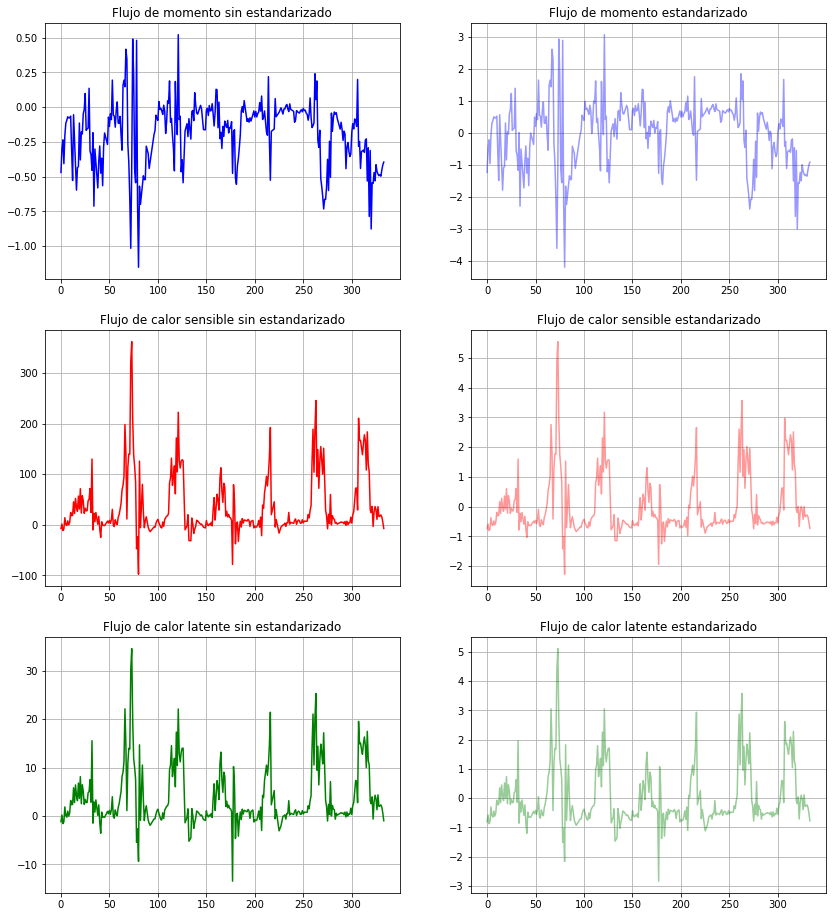

In [27]:
fig, ax = plt.subplots(3,2,figsize=(14, 16))

ax00 = ax[0,0]
ax00.plot(date,M_fill, c = 'blue')
ax00.grid()
ax00.set_title('Flujo de momento sin estandarizado')

# ax01 = ax[0,1]
# ax01.plot(date,M_flux, c = 'blue', alpha = 0.4)
# ax01.grid()
# ax01.set_title('Flujo de momento estandarizado')

ax10 = ax[1,0]
ax10.plot(date,H_fill, c = 'red')
ax10.grid()
ax10.set_title('Flujo de calor sensible sin estandarizado')

# ax11 = ax[1,1]
# ax11.plot(date,H_flux, c = 'red', alpha = 0.4)
# ax11.grid()
# ax11.set_title('Flujo de calor sensible estandarizado')

ax20 = ax[2,0]
ax20.plot(date,LE_fill, c = 'green')
ax20.grid()
ax20.set_title('Flujo de calor latente sin estandarizado')

# ax21 = ax[2,1]
# ax21.plot(date,LE_flux, c = 'green', alpha = 0.4)
# ax21.grid()
# ax21.set_title('Flujo de calor latente estandarizado')

Es apreciable que el flujo de calor latente y sensible son demasiado similares y que el primero solo es un escalamiento del segundo. Esto debe verificarse con algún paper que trabaje estos flujos.

In [25]:
#Estadśitica descriptiva rápida de las series de salida

print(ss.describe(LE_flux))
print()
print(ss.describe(H_flux))
print()
print(ss.describe(M_flux))


DescribeResult(nobs=334, minmax=(-2.836207479898169, 5.10936726888776), mean=1.1168710666887802e-16, variance=1.003003003003003, skewness=1.597700503923804, kurtosis=3.5294148477109477)

DescribeResult(nobs=334, minmax=(-2.26644785810151, 5.544433470156237), mean=1.1700554031977699e-16, variance=1.003003003003003, skewness=1.9213469517740878, kurtosis=4.811240691324278)

DescribeResult(nobs=334, minmax=(-4.20961880389096, 3.0706800102083887), mean=2.1273734603595815e-17, variance=1.003003003003003, skewness=-0.5708279364372864, kurtosis=1.3526363690900753)


### Datos de entrada

In [18]:
paths_stats = glob.glob(r'/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_stats/eddypro_VF1_st1_*.csv')

In [19]:
paths_stats = paths_stats[0:7]
paths_stats

['/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_stats/eddypro_VF1_st1_2020-01-28T110226_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_stats/eddypro_VF1_st1_2020-01-28T112223_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_stats/eddypro_VF1_st1_2020-01-28T112628_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_stats/eddypro_VF1_st1_2020-01-28T113027_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_stats/eddypro_VF1_st1_2020-01-28T113436_adv.csv',
 '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Datos/VF1/eddypro_stats/eddypro_VF1_st1_2020-01-28T113821_adv.csv',
 '/media/m

In [20]:
u_mean = [] # velocidad u media del viento 
v_mean = [] # velocidad y media del viento
w_mean = [] # velocidad w media del viento
T_mean = [] # temperatura T media
q_mean = [] # humedada q media 1

for j,i in enumerate(paths_stats):
    df1 = pd.read_csv(i, sep = ',', header = 1)
    ui = df1['mean(u)'].values
    vi = df1['mean(v)'].values
    wi = df1['mean(w)'].values
    Ti = df1['mean(ts)'].values
    qi = df1['mean(h2o)'].values
    hours = df1.time.values
    if (ui.shape[0]) < 48: # Llenar u,v,t,q con un nan
        hours_correct = [datetime.strptime(df.date.values[0], '%Y-%m-%d')+ timedelta(minutes = i) for i in range(0,60*24,30)]
        for k,m in enumerate(hours_correct):
            d = m.strftime('%H:%M')
            if d in hours:
                pass
            else:
                ui = np.insert(ui,k,np.nan)
                vi = np.insert(vi,k,np.nan)
                wi = np.insert(wi,k,np.nan)
                Ti = np.insert(Ti,k,np.nan)
                qi = np.insert(qi,k,np.nan)


            u_mean.append(ui[k])
            v_mean.append(vi[k])
            w_mean.append(wi[k])
            T_mean.append(Ti[k])
            q_mean.append(qi[k])


u_mean = np.array(u_mean)
v_mean = np.array(v_mean)
w_mean = np.array(w_mean)
T_mean = np.array(T_mean)
q_mean = np.array(q_mean) #---> mmol/m3
# q = 18*(10**-3)*q #18g/mol*(10^-3)mol/mmol*(mmol/m^3)----> g/m3

In [34]:
date1 = pd.date_range('2019-12-27 00:00:00', periods =M.shape[0],freq='1800S')
date1

DatetimeIndex(['2019-12-27 00:00:00', '2019-12-27 00:30:00',
               '2019-12-27 01:00:00', '2019-12-27 01:30:00',
               '2019-12-27 02:00:00', '2019-12-27 02:30:00',
               '2019-12-27 03:00:00', '2019-12-27 03:30:00',
               '2019-12-27 04:00:00', '2019-12-27 04:30:00',
               ...
               '2020-01-02 19:00:00', '2020-01-02 19:30:00',
               '2020-01-02 20:00:00', '2020-01-02 20:30:00',
               '2020-01-02 21:00:00', '2020-01-02 21:30:00',
               '2020-01-02 22:00:00', '2020-01-02 22:30:00',
               '2020-01-02 23:00:00', '2020-01-02 23:30:00'],
              dtype='datetime64[ns]', length=336, freq='1800S')

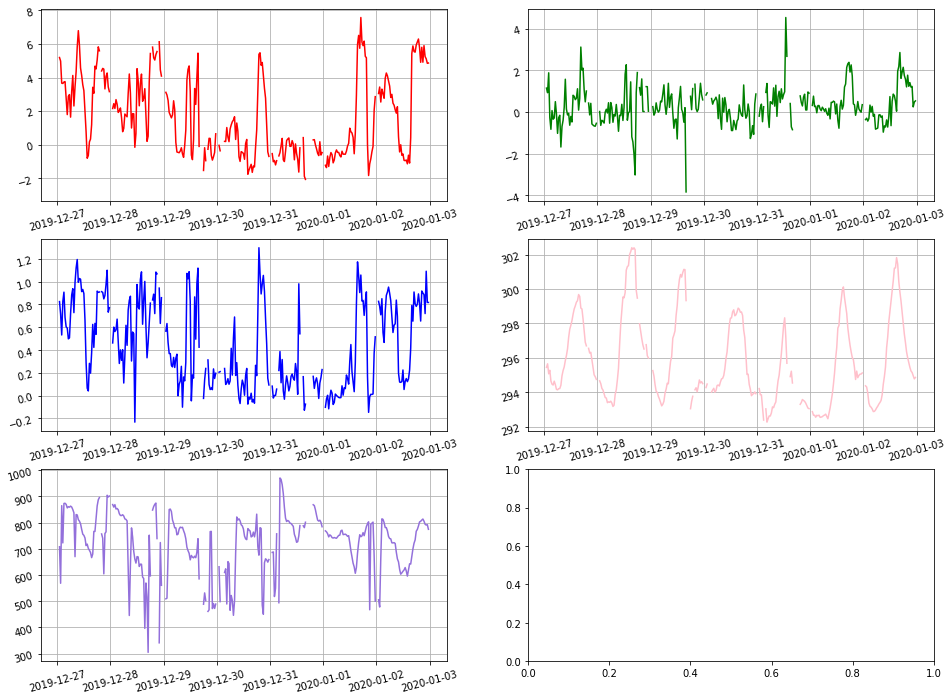

In [43]:
fig, axs = plt.subplots(3,2,figsize = [16,12])

ax1 = axs[0,0]
ax1.plot(date1, u_mean, c = 'r')
ax1.tick_params(labelrotation=15)
ax1.grid()

ax2 = axs[0,1]
ax2.plot(date1, v_mean, c = 'g')
ax2.tick_params(labelrotation=15)
ax2.grid()

ax3 = axs[1,0]
ax3.plot(date1, w_mean, c = 'b')
ax3.tick_params(labelrotation=15)
ax3.grid()

ax4 = axs[1,1]
ax4.plot(date1, T_mean, c = 'pink')
ax4.tick_params(labelrotation=15)
ax4.grid()

ax5 = axs[2,0]
ax5.plot(date1, q_mean, c = 'mediumpurple')
ax5.tick_params(labelrotation=15)
ax5.grid()

In [45]:
u_fillmean = fill_nan(u_mean)[np.where(np.isnan(fill_nan(u_mean))==False)[0]]
v_fillmean = fill_nan(v_mean)[np.where(np.isnan(fill_nan(v_mean))==False)[0]]
w_fillmean = fill_nan(w_mean)[np.where(np.isnan(fill_nan(w_mean))==False)[0]]
T_fillmean = fill_nan(T_mean)[np.where(np.isnan(fill_nan(T_mean))==False)[0]]
q_fillmean = fill_nan(q_mean)[np.where(np.isnan(fill_nan(q_mean))==False)[0]]

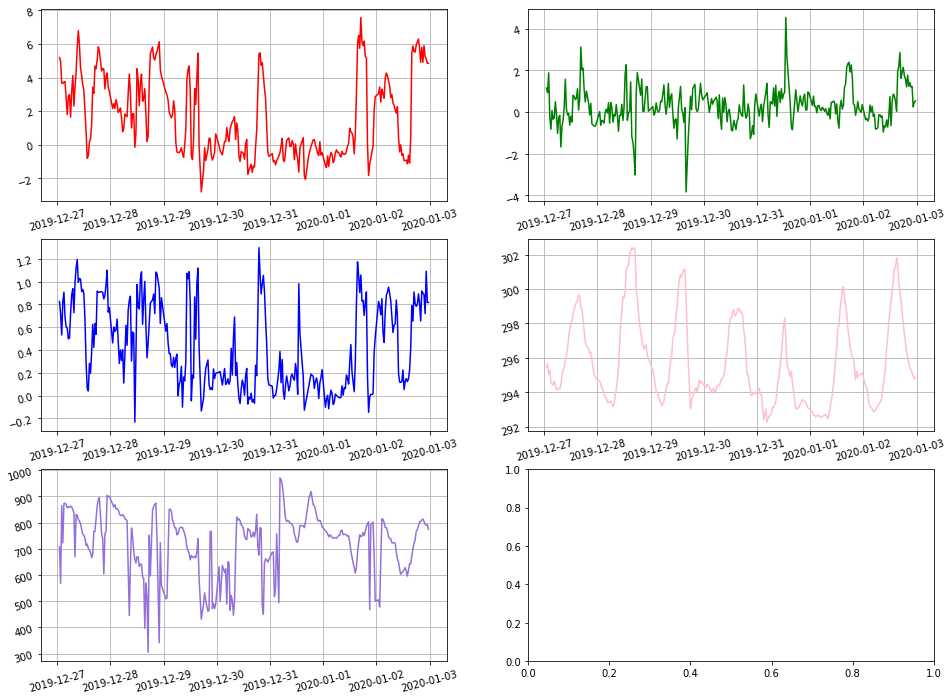

In [47]:
fig, axs = plt.subplots(3,2,figsize = [16,12])

ax1 = axs[0,0]
ax1.plot(date, u_fillmean, c = 'r')
ax1.tick_params(labelrotation=15)
ax1.grid()

ax2 = axs[0,1]
ax2.plot(date, v_fillmean, c = 'g')
ax2.tick_params(labelrotation=15)
ax2.grid()

ax3 = axs[1,0]
ax3.plot(date, w_fillmean, c = 'b')
ax3.tick_params(labelrotation=15)
ax3.grid()

ax4 = axs[1,1]
ax4.plot(date, T_fillmean, c = 'pink')
ax4.tick_params(labelrotation=15)
ax4.grid()

ax5 = axs[2,0]
ax5.plot(date, q_fillmean, c = 'mediumpurple')
ax5.tick_params(labelrotation=15)
ax5.grid()

### Remover ciclo diario

In [685]:
def TFourier(serie,freqD):
    serie = serie-np.nanmean(serie)
    FT = np.fft.fft(serie)
    Potencia = np.abs(1./len(serie)*FT)**2
    Freq = np.fft.fftfreq(len(serie),1/freqD)
    Periodo = 1/Freq
    FreqPos = np.where(Freq > 0)[0]
    
    plt.figure(0)
    plt.plot(Periodo[FreqPos],Potencia[FreqPos])
    plt.title('Espectros sin remoción')
    plt.ylabel('Potencia')
    plt.xlabel('Periodo')
    plt.grid()
    
    Caso = int(input('Qué caso va a usar?: '))
    FFT = np.copy(FT)
    
    if Caso == 0:
        EliminarP = float(input('Eliminar periodos mayores a: '))
        FFT[np.where(((np.abs(1./Freq) > EliminarP)))[0]] = 0
    elif Caso == 1:
        EliminarP = float(input('Eliminar periodos menores a: '))
        FFT[np.where(((np.abs(1./Freq) < EliminarP)))[0]] = 0
    elif Caso == 2:
        Pmin = float(input('Cuál es el rango inferior: '))
        Pmax = float(input('Cuál es el rango superior: '))
        FFT[np.where(((np.abs(1./Freq) >= Pmin ) & (np.abs(1/Freq) <= Pmax)))[0]] = 0
    elif Caso == 3:
        Pmin = float(input('Cuál es el rango inferior: '))
        Pmax = float(input('Cuál es el rango superior: '))
        FFT[np.where(((np.abs(1./Freq) <= Pmin ) | (np.abs(1/Freq) >= Pmax)))[0]] = 0

    SerieMod = np.fft.ifft(FFT)
    FT2 = np.fft.fft(SerieMod)
    Potencia2 = np.abs(1./len(SerieMod)*FT2)**2
    Freq2 = np.fft.fftfreq(len(SerieMod),1/freqD)
    Periodo2 = 1/Freq2
    FreqPos2 = np.where(Freq2 > 0)[0]
    
    plt.figure(1)
    plt.plot(Periodo2[FreqPos2],Potencia2[FreqPos2])
    plt.title('Espectros con remoción')
    plt.ylabel('Potencia')
    plt.xlabel('Periodo')
    plt.grid(1)
   
    return (SerieMod.real,Potencia,Potencia2)
    

Qué caso va a usar?: 0
Eliminar periodos mayores a: 47
Qué caso va a usar?: 0
Eliminar periodos mayores a: 47
Qué caso va a usar?: 0
Eliminar periodos mayores a: 47
Qué caso va a usar?: 0
Eliminar periodos mayores a: 47
Qué caso va a usar?: 0
Eliminar periodos mayores a: 47
Qué caso va a usar?: 0
Eliminar periodos mayores a: 47
Qué caso va a usar?: 0
Eliminar periodos mayores a: 47
Qué caso va a usar?: 0
Eliminar periodos mayores a: 47


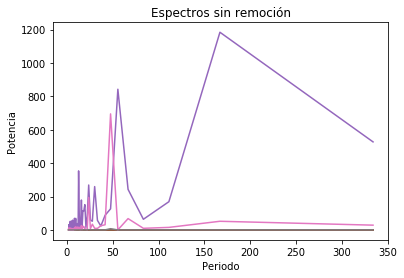

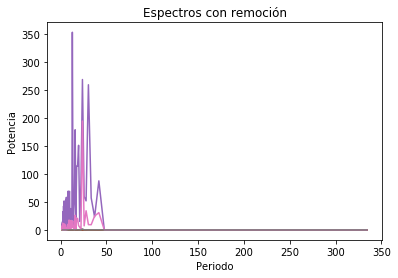

In [56]:
u_NoDay, potu_fillmean, potu_NoDay = TFourier(u_fillmean,1)
v_NoDay, potv_fillmean, potv_NoDay = TFourier(v_fillmean,1)
w_NoDay, potw_fillmean, potw_NoDay = TFourier(w_fillmean,1)
T_NoDay, potT_fillmean, potT_NoDay = TFourier(T_fillmean,1)
q_NoDay, potq_fillmean, potq_NoDay = TFourier(q_fillmean,1)


M_NoDay, potM_fill, potM_NoDay = TFourier(M_fill,1)
H_NoDay, potH_fill, potH_NoDay = TFourier(H_fill,1)
LE_NoDay, potLE_fill, potLE_NoDay = TFourier(LE_fill,1)


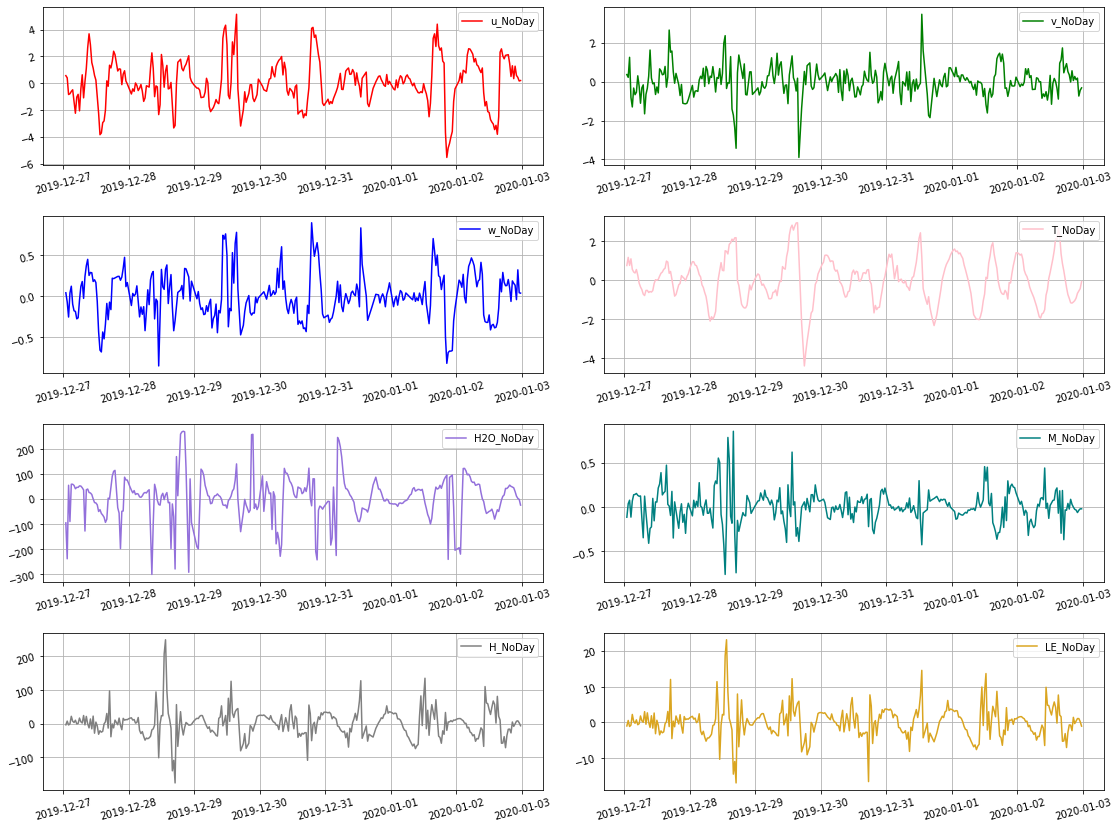

In [62]:
fig, axs = plt.subplots(4,2,figsize = [16,12])
fig.tight_layout(pad=3.0)

ax1 = axs[0,0]
ax1.plot(date, u_NoDay, c = 'r', label = 'u_NoDay')
ax1.tick_params(labelrotation=15)
ax1.grid()
ax1.legend(loc="upper right")

ax2 = axs[0,1]
ax2.plot(date, v_NoDay, c = 'g', label = 'v_NoDay')
ax2.tick_params(labelrotation=15)
ax2.grid()
ax2.legend(loc="upper right")

ax3 = axs[1,0]
ax3.plot(date, w_NoDay, c = 'b', label = 'w_NoDay')
ax3.tick_params(labelrotation=15)
ax3.grid()
ax3.legend(loc="upper right")

ax4 = axs[1,1]
ax4.plot(date, T_NoDay, c = 'pink', label = 'T_NoDay')
ax4.tick_params(labelrotation=15)
ax4.grid()
ax4.legend(loc="upper right")

ax5 = axs[2,0]
ax5.plot(date, q_NoDay, c = 'mediumpurple', label = 'H2O_NoDay')
ax5.tick_params(labelrotation=15)
ax5.grid()
ax5.legend(loc="upper right")

ax6 = axs[2,1]
ax6.plot(date, M_NoDay, c = 'teal', label = 'M_NoDay')
ax6.tick_params(labelrotation=15)
ax6.grid()
ax6.legend(loc="upper right")

ax7 = axs[3,0]
ax7.plot(date, H_NoDay, c = 'grey', label = 'H_NoDay')
ax7.tick_params(labelrotation=15)
ax7.grid()
ax7.legend(loc="upper right")

ax8 = axs[3,1]
ax8.plot(date, LE_NoDay, c = 'goldenrod', label = 'LE_NoDay')
ax8.tick_params(labelrotation=15)
ax8.grid()
ax8.legend(loc="upper right")


In [64]:
print('VARIABLES DE ENTRADA')
print(ss.describe(u_NoDay))
print()
print(ss.describe(v_NoDay))
print()
print(ss.describe(w_NoDay))
print()
print(ss.describe(T_NoDay))
print()
print(ss.describe(q_NoDay))
print()

print('VARIABLES DE SALIDA')
print(ss.describe(M_NoDay))
print()
print(ss.describe(H_NoDay))
print()
print(ss.describe(LE_NoDay))

VARIABLES DE ENTRADA
DescribeResult(nobs=334, minmax=(-5.542925796917331, 5.144094580371286), mean=-3.191060190539372e-17, variance=2.8092488995059735, skewness=0.008433434196469847, kurtosis=0.5856602755954334)

DescribeResult(nobs=334, minmax=(-3.904196761239944, 3.482591662898223), mean=-1.9944126190871075e-18, variance=0.608024949858246, skewness=-0.27440798535024363, kurtosis=4.152744778934494)

DescribeResult(nobs=334, minmax=(-0.8567338886965497, 0.8927744491582937), mean=6.648042063623692e-19, variance=0.07711708443930178, skewness=0.20287442783825663, kurtosis=0.8415777153356729)

DescribeResult(nobs=334, minmax=(-4.403881153958293, 2.9436405899825617), mean=-2.393295142904529e-17, variance=1.3489498452647275, skewness=-0.17584336639127485, kurtosis=0.5292496548245209)

DescribeResult(nobs=334, minmax=(-302.1569098952043, 269.19041442740166), mean=1.3615190146301322e-15, variance=8053.448315220944, skewness=-0.36461745620979125, kurtosis=1.9443495987516064)

VARIABLES DE SALID

### Estandarizar

In [65]:
def estandarizar(serie):
    anomaly = (serie -np.nanmean(serie))/np.nanstd(serie)
    return(anomaly)

In [66]:
u_estandarizada = estandarizar(u_NoDay)
v_estandarizada = estandarizar(v_NoDay)
w_estandarizada = estandarizar(w_NoDay)
T_estandarizada = estandarizar(T_NoDay)
q_estandarizada = estandarizar(q_NoDay)


M_estandarizada = estandarizar(M_NoDay)
H_estandarizada = estandarizar(H_NoDay)
LE_estandarizada = estandarizar(LE_NoDay)


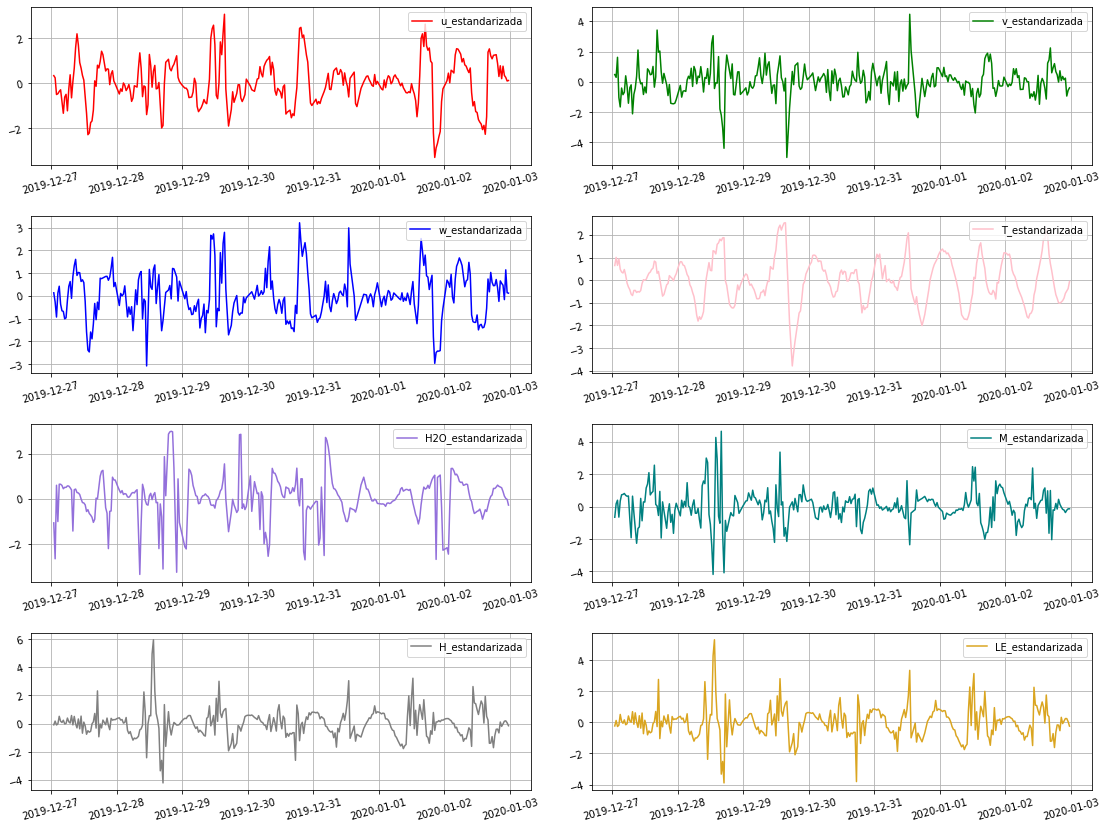

In [67]:
fig, axs = plt.subplots(4,2,figsize = [16,12])
fig.tight_layout(pad=3.0)

ax1 = axs[0,0]
ax1.plot(date, u_estandarizada, c = 'r', label = 'u_estandarizada')
ax1.tick_params(labelrotation=15)
ax1.grid()
ax1.legend(loc="upper right")

ax2 = axs[0,1]
ax2.plot(date, v_estandarizada, c = 'g', label = 'v_estandarizada')
ax2.tick_params(labelrotation=15)
ax2.grid()
ax2.legend(loc="upper right")

ax3 = axs[1,0]
ax3.plot(date, w_estandarizada, c = 'b', label = 'w_estandarizada')
ax3.tick_params(labelrotation=15)
ax3.grid()
ax3.legend(loc="upper right")

ax4 = axs[1,1]
ax4.plot(date, T_estandarizada, c = 'pink', label = 'T_estandarizada')
ax4.tick_params(labelrotation=15)
ax4.grid()
ax4.legend(loc="upper right")

ax5 = axs[2,0]
ax5.plot(date, q_estandarizada, c = 'mediumpurple', label = 'H2O_estandarizada')
ax5.tick_params(labelrotation=15)
ax5.grid()
ax5.legend(loc="upper right")

ax6 = axs[2,1]
ax6.plot(date, M_estandarizada, c = 'teal', label = 'M_estandarizada')
ax6.tick_params(labelrotation=15)
ax6.grid()
ax6.legend(loc="upper right")

ax7 = axs[3,0]
ax7.plot(date, H_estandarizada, c = 'grey', label = 'H_estandarizada')
ax7.tick_params(labelrotation=15)
ax7.grid()
ax7.legend(loc="upper right")

ax8 = axs[3,1]
ax8.plot(date, LE_estandarizada, c = 'goldenrod', label = 'LE_estandarizada')
ax8.tick_params(labelrotation=15)
ax8.grid()
ax8.legend(loc="upper right")

In [72]:
print('VARIABLES DE ENTRADA')
print(ss.describe(u_estandarizada))
print()
print(ss.describe(v_estandarizada))
print()
print(ss.describe(w_estandarizada))
print()
print(ss.describe(T_estandarizada))
print()
print(ss.describe(q_estandarizada))
print()

print('VARIABLES DE SALIDA')
print(ss.describe(M_estandarizada))
print()
print(ss.describe(H_estandarizada))
print()
print(ss.describe(LE_estandarizada))

VARIABLES DE ENTRADA
DescribeResult(nobs=334, minmax=(-3.3120361754544074, 3.0737245931785586), mean=-7.97765047634843e-18, variance=1.0030030030030033, skewness=0.008433434196469792, kurtosis=0.5856602755954325)

DescribeResult(nobs=334, minmax=(-5.014436236494859, 4.472938967811023), mean=-1.4625692539972123e-17, variance=1.003003003003003, skewness=-0.27440798535024363, kurtosis=4.152744778934491)

DescribeResult(nobs=334, minmax=(-3.0897387654336073, 3.2197160177120523), mean=7.97765047634843e-18, variance=1.003003003003003, skewness=0.20287442783825677, kurtosis=0.8415777153356729)

DescribeResult(nobs=334, minmax=(-3.7974215061293073, 2.5382710595329576), mean=-1.3296084127247384e-17, variance=1.003003003003003, skewness=-0.17584336639127487, kurtosis=0.5292496548245191)

DescribeResult(nobs=334, minmax=(-3.3720399334093942, 3.004137245959536), mean=0.0, variance=1.0030030030030033, skewness=-0.3646174562097912, kurtosis=1.9443495987516055)

VARIABLES DE SALIDA
DescribeResult(nob

### Escalar

In [979]:
def escalamiento(serie):
    ret = 0.1*((serie / np.nanmax(abs(serie))))
    return ret

In [980]:
# # Variables de entranda 
# u_wind = estandarizar(u_fill)
# v_wind = estandarizar(v_fill)
# w_wind = estandarizar(w_fill)
# t_wind = estandarizar(t_fill)
# q_wind = estandarizar(q_fill)

# #Variables de Salida 
# M_flux = estandarizar(M_fill)
# H_flux = estandarizar(H_fill)
# LE_flux = estandarizar(LE_fill)

In [981]:
# Variables de entranda 
u_escalada = escalamiento(u_estandarizada)
v_escalada = escalamiento(v_estandarizada)
w_escalada = escalamiento(w_estandarizada)
T_escalada = escalamiento(T_estandarizada)
q_escalada = escalamiento(q_estandarizada)

#Variables de Salida 
M_escalada = escalamiento(M_estandarizada)
H_escalada = escalamiento(H_estandarizada)
LE_escalada = escalamiento(LE_estandarizada)

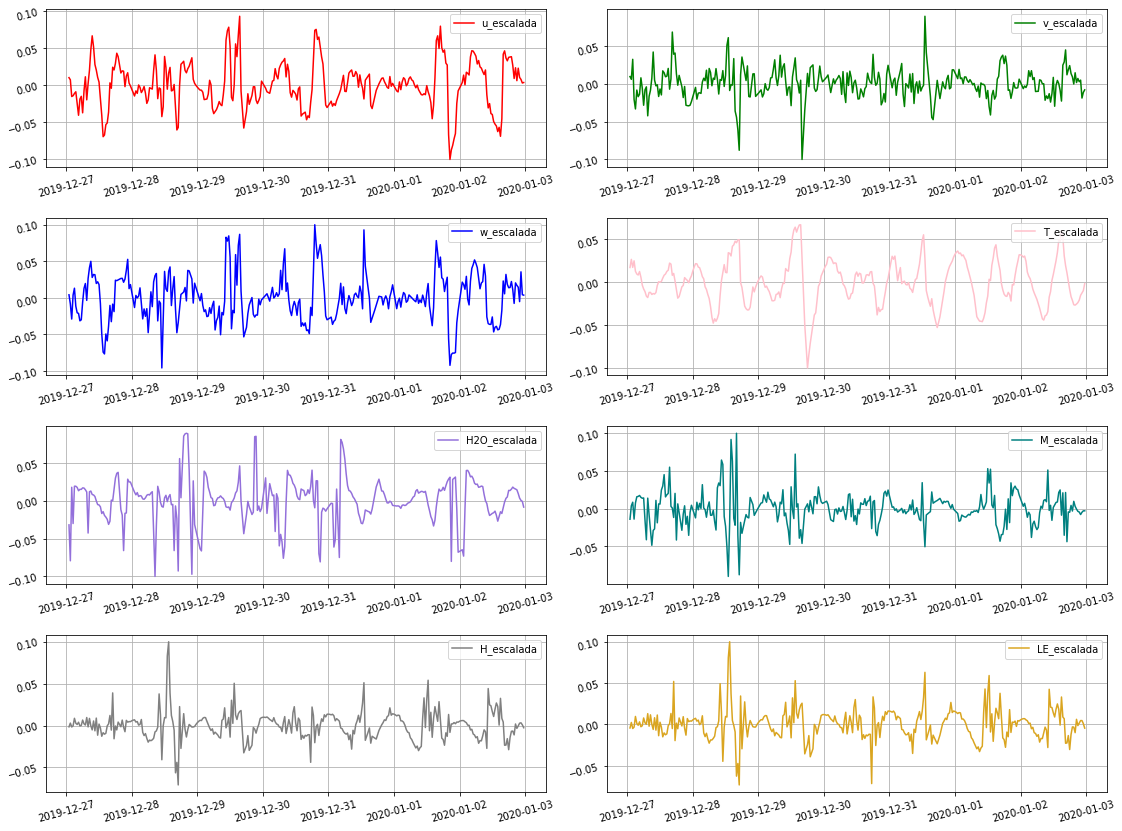

In [982]:
fig, axs = plt.subplots(4,2,figsize = [16,12])
fig.tight_layout(pad=3.0)

ax1 = axs[0,0]
ax1.plot(date, u_escalada, c = 'r', label = 'u_escalada')
ax1.tick_params(labelrotation=15)
ax1.grid()
ax1.legend(loc="upper right")

ax2 = axs[0,1]
ax2.plot(date, v_escalada, c = 'g', label = 'v_escalada')
ax2.tick_params(labelrotation=15)
ax2.grid()
ax2.legend(loc="upper right")

ax3 = axs[1,0]
ax3.plot(date, w_escalada, c = 'b', label = 'w_escalada')
ax3.tick_params(labelrotation=15)
ax3.grid()
ax3.legend(loc="upper right")

ax4 = axs[1,1]
ax4.plot(date, T_escalada, c = 'pink', label = 'T_escalada')
ax4.tick_params(labelrotation=15)
ax4.grid()
ax4.legend(loc="upper right")

ax5 = axs[2,0]
ax5.plot(date, q_escalada, c = 'mediumpurple', label = 'H2O_escalada')
ax5.tick_params(labelrotation=15)
ax5.grid()
ax5.legend(loc="upper right")

ax6 = axs[2,1]
ax6.plot(date, M_escalada, c = 'teal', label = 'M_escalada')
ax6.tick_params(labelrotation=15)
ax6.grid()
ax6.legend(loc="upper right")

ax7 = axs[3,0]
ax7.plot(date, H_escalada, c = 'grey', label = 'H_escalada')
ax7.tick_params(labelrotation=15)
ax7.grid()
ax7.legend(loc="upper right")

ax8 = axs[3,1]
ax8.plot(date, LE_escalada, c = 'goldenrod', label = 'LE_escalada')
ax8.tick_params(labelrotation=15)
ax8.grid()
ax8.legend(loc="upper right")

In [983]:
print(u_escalada.shape,v_escalada.shape,w_escalada.shape,T_escalada.shape,q_escalada.shape,M_escalada.shape,H_escalada.shape,LE_escalada.shape)

(334,) (334,) (334,) (334,) (334,) (334,) (334,) (334,)


In [984]:
print('VARIABLES DE ENTRADA')
print(ss.describe(u_escalada))
print()
print(ss.describe(v_escalada))
print()
print(ss.describe(w_escalada))
print()
print(ss.describe(T_escalada))
print()
print(ss.describe(q_escalada))
print()

print('VARIABLES DE SALIDA')
print(ss.describe(M_escalada))
print()
print(ss.describe(H_escalada))
print()
print(ss.describe(LE_escalada))

VARIABLES DE ENTRADA
DescribeResult(nobs=334, minmax=(-0.1, 0.09280468057559327), mean=-1.2465078869294422e-19, variance=0.0009143492014472062, skewness=0.008433434196469851, kurtosis=0.585660275595433)

DescribeResult(nobs=334, minmax=(-0.1, 0.08920123333620555), mean=-1.662010515905923e-19, variance=0.00039889446202229993, skewness=-0.2744079853502437, kurtosis=4.152744778934495)

DescribeResult(nobs=334, minmax=(-0.09596308334140576, 0.1), mean=1.662010515905923e-19, variance=0.0009675359193448025, skewness=0.20287442783825674, kurtosis=0.8415777153356738)

DescribeResult(nobs=334, minmax=(-0.1, 0.06684196251156234), mean=-4.570528918741289e-19, variance=0.0006955440215503537, skewness=-0.17584336639127496, kurtosis=0.5292496548245196)

DescribeResult(nobs=334, minmax=(-0.1, 0.08908961060025526), mean=4.986031547717769e-19, variance=0.0008820979546528848, skewness=-0.3646174562097912, kurtosis=1.9443495987516073)

VARIABLES DE SALIDA
DescribeResult(nobs=334, minmax=(-0.0898704114843

In [985]:
print(ss.describe(wind))

DescribeResult(nobs=336, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)


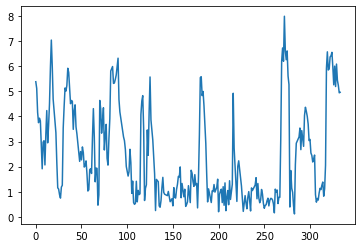

In [986]:
wind_fill = fill_nan(wind)[np.where(np.isnan(fill_nan(wind))==False)[0]]
plt.plot(wind_fill)

In [987]:
print(ss.describe(wind_fill))

DescribeResult(nobs=334, minmax=(0.114287, 7.99537), mean=2.4591813188622753, variance=3.4358004935792357, skewness=0.7667217078748875, kurtosis=-0.5872930166341832)


Qué caso va a usar?: 0
Eliminar periodos mayores a: 47


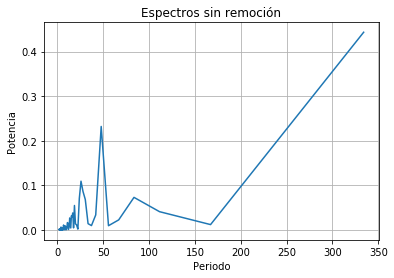

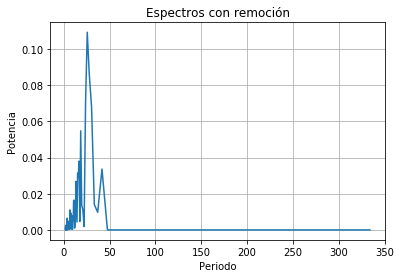

In [692]:
wind_NoDay, potWind, potWind_NoDay = TFourier(wind_fill,1)

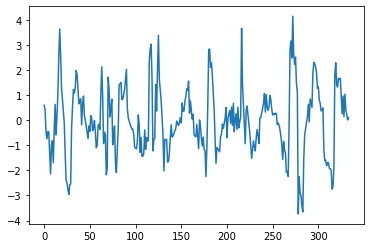

In [988]:
plt.plot(wind_NoDay)

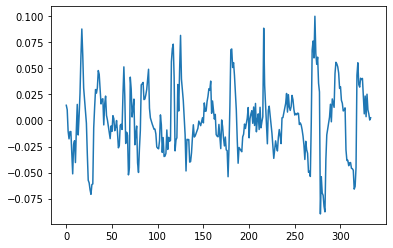

In [989]:
wind_escalada = escalamiento(wind_NoDay)
plt.plot(wind_escalada)
                             

### Separar en train y test

In [990]:
#para entrenamiento 
porc = 0.7
train_u = u_escalada[:int(porc*len(u_escalada))]
train_v = v_escalada[:int(porc*len(v_escalada))]
train_w = w_escalada[:int(porc*len(w_escalada))]
train_T = T_escalada[:int(porc*len(T_escalada))]
train_q = q_escalada[:int(porc*len(q_escalada))]
train_wind = wind_escalada[:int(porc*len(wind_escalada))]
train_M = M_escalada[:int(porc*len(M_escalada))]
train_H = H_escalada[:int(porc*len(H_escalada))]
train_LE = LE_escalada[:int(porc*len(LE_escalada))]

In [991]:
#para test 
porc2 = 1 - porc
test_u = u_escalada[int(porc*len(u_escalada)):]
test_v = v_escalada[int(porc*len(v_escalada)):]
test_w = w_escalada[int(porc*len(w_escalada)):]
test_T = T_escalada[int(porc*len(T_escalada)):]
test_q = q_escalada[int(porc*len(q_escalada)):]
test_wind = wind_escalada[int(porc*len(wind_escalada)):]
test_M = M_escalada[int(porc*len(M_escalada)):]
test_H = H_escalada[int(porc*len(H_escalada)):]
test_LE = LE_escalada[int(porc*len(LE_escalada)):]

In [992]:
print('PORCIÓN DE ENTRENAMIENTO')
print(train_wind.shape)
print()      
print('PORCIÓN DE PRUEBA')
print(test_wind.shape)

PORCIÓN DE ENTRENAMIENTO
(233,)

PORCIÓN DE PRUEBA
(101,)


In [993]:
print('PORCIÓN DE ENTRENAMIENTO')
print(train_u.shape,train_v.shape,train_w.shape,train_T.shape,train_q.shape,train_M.shape,train_H.shape,train_LE.shape)

print('PORCIÓN DE PRUEBA')
print(test_u.shape,test_v.shape,test_w.shape,test_T.shape,test_q.shape,test_M.shape,test_H.shape,test_LE.shape)


PORCIÓN DE ENTRENAMIENTO
(233,) (233,) (233,) (233,) (233,) (233,) (233,) (233,)
PORCIÓN DE PRUEBA
(101,) (101,) (101,) (101,) (101,) (101,) (101,) (101,)


### Creación de la red

In [774]:
dsCalib=SupervisedDataSet(3,1)

for p1,p2,p3,res1 in zip(train_wind,train_T,train_q,train_H):
    dsCalib.addSample((p1,p2,p3),(res1))
    
#-----> Una capa oculta
entradas,nodos_por_capa1, salidas = 3,2,1
net = buildNetwork(entradas, nodos_por_capa1, salidas, bias=True,hiddenclass = LinearLayer,\
                   outclass =LinearLayer)

net.reset()
trainer = BackpropTrainer(net,dsCalib)
n_conexiones = entradas*nodos_por_capa1+nodos_por_capa1*salidas

In [1014]:
dsCalib=SupervisedDataSet(5,1)
# dsCalib2=SupervisedDataSet(5,3)

for p1,p2,p3,p4,p5,res1 in zip(train_u,train_v,train_w,train_T,train_q,train_H):
    dsCalib.addSample((p1,p2,p3,p4,p5),(res1))
#     dsCalib2.addSample((p1,p2,p3,p4,p5),(res1,res2,res3))

# for p1,p2,p3,res1 in zip(train_u,train_v,train_w,train_M):
#     dsCalib.addSample((p1,p2,p3),(res1))
#     dsCalib2.addSample((p1,p2,p3),(res1))

    
#Montar la red

#-----> Una capa oculta
# entradas, nodos_por_capa1, salidas = 5,4,3
# net = buildNetwork(entradas, nodos_por_capa1, salidas, bias=True, hiddenclass=LinearLayer,\
#                    outclass = LinearLayer)

# net.reset()
# trainer = BackpropTrainer(net,dsCalib)
# n_conexiones = entradas*nodos_por_capa1 + nodos_por_capa1*salidas

#-----> Dos capa oculta
# entradas, nodos_por_capa1,nodos_por_capa2, salidas = 5,4,3,1
# net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2, salidas, bias=True, hiddenclass=LinearLayer,\
#                   outclass = LinearLayer)

# net.reset()
# trainer = BackpropTrainer(net,dsCalib)
# n_conexiones = entradas*nodos_por_capa1 +nodos_por_capa1*nodos_por_capa2+ nodos_por_capa2*salidas

#-----> Tres capa oculta
# entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, salidas = 5,4,3,2,1
# net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2, nodos_por_capa3, salidas, bias=True,\
#                    hiddenclass=LinearLayer,outclass = LinearLayer)

# net.reset()
# trainer = BackpropTrainer(net,dsCalib)
# n_conexiones = entradas*nodos_por_capa1 +nodos_por_capa1*nodos_por_capa2+nodos_por_capa2*nodos_por_capa3+\
# nodos_por_capa3*salidas

#-----> Cuatro capa oculta
entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3,nodos_por_capa4, salidas = 5,4,4,3,2,1
net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2, nodos_por_capa3, nodos_por_capa4, salidas, bias=True,\
                   hiddenclass=LinearLayer,outclass = LinearLayer)

net.reset()
trainer = BackpropTrainer(net,dsCalib)
n_conexiones = entradas*nodos_por_capa1 +nodos_por_capa1*nodos_por_capa2+nodos_por_capa2*nodos_por_capa3+nodos_por_capa3*nodos_por_capa4+nodos_por_capa4*salidas

In [1015]:
print(dsCalib['input'].shape, dsCalib['target'].shape)

(233, 5) (233, 1)


In [1016]:
# Entrenar la red 
iteraciones = 55
errors = []
PesosEvol = np.zeros((iteraciones, n_conexiones))
activacion=[]
for j in range(iteraciones):
    print (j,end=' ')
    #Entrena y mira como evoluciona el entrenamiento
    errors.append(trainer.train()) #tasa de aprendizaje por defecto 0.01
    activacion.append(net.activateOnDataset(dsCalib))
    Pesos=[]
    for i in net.modules:
        if i.name != 'bias':
        
            for c in net.connections[i]:
                Pesos.append(c.params)
                
            
                #print c.params               
    #Guarda la evolucion de los pesos de las entradas
    Pesos = np.concatenate(np.array(Pesos)).reshape(n_conexiones)
    PesosEvol[j,:]=Pesos
            #print Pesos
activacion = np.array(activacion)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 

55


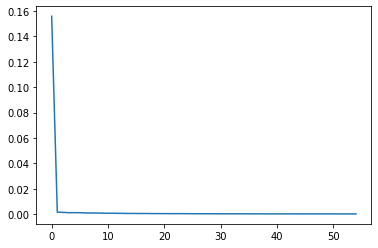

In [1017]:
print(len(errors))
plt.plot(errors)

In [1018]:
activacion.shape

(55, 233, 1)

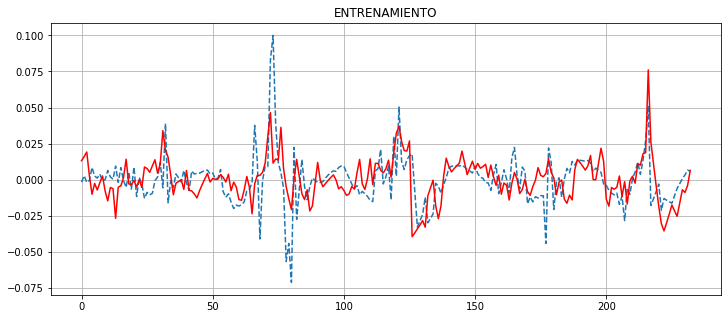

In [1022]:
plt.figure(figsize = (12,5))
plt.title('ENTRENAMIENTO')
plt.plot(train_H,'--')
plt.plot(activacion[-1,:,0], color='red')
plt.grid()

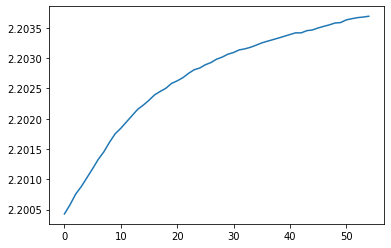

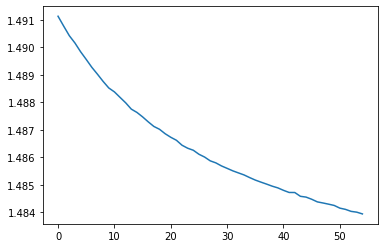

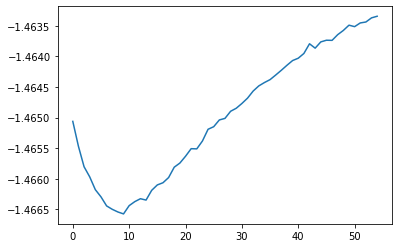

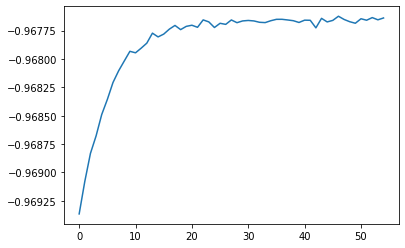

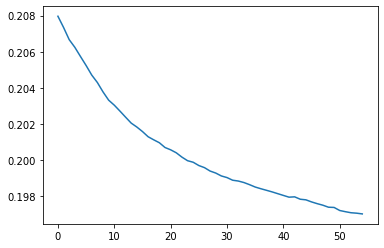

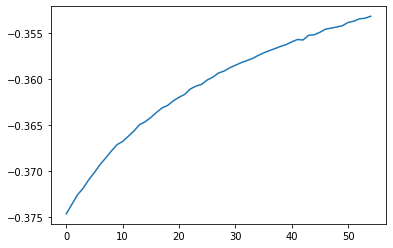

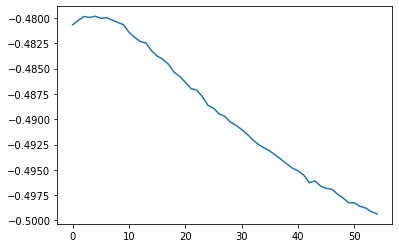

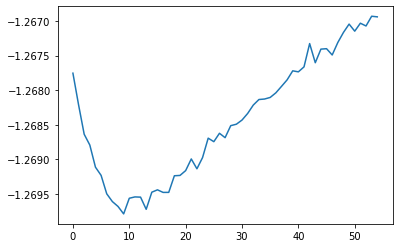

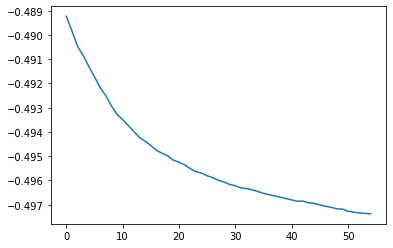

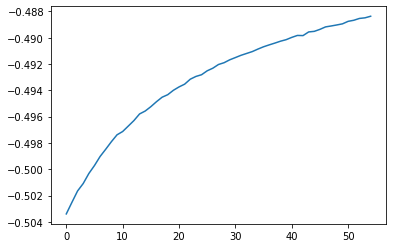

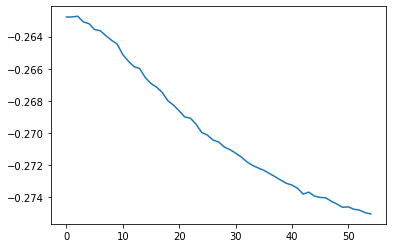

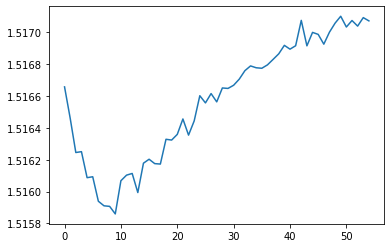

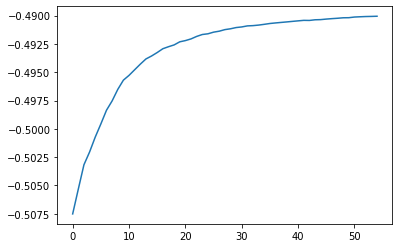

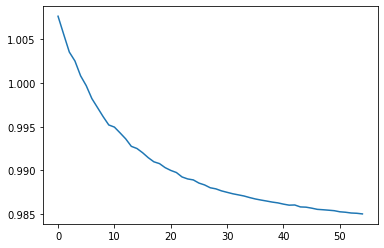

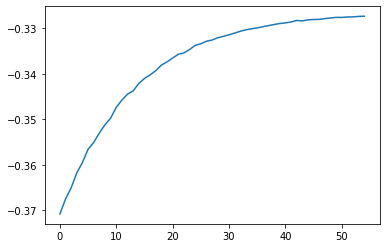

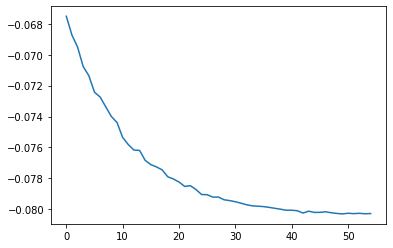

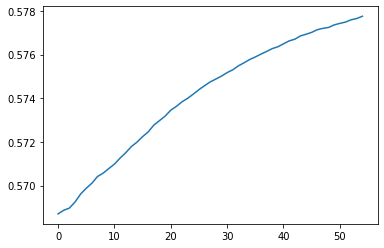

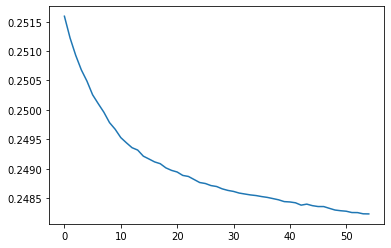

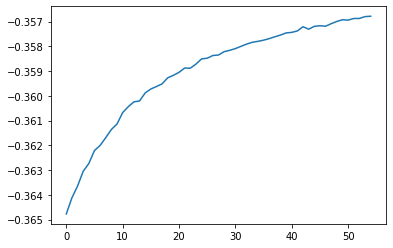

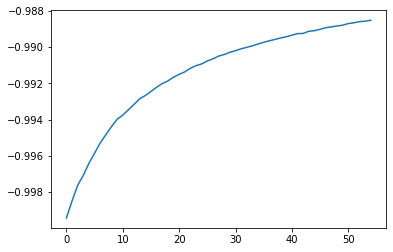

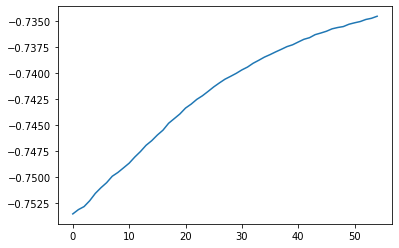

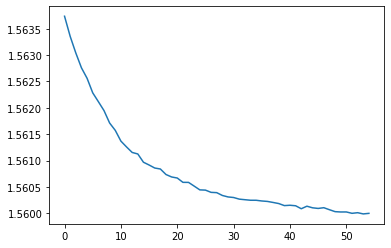

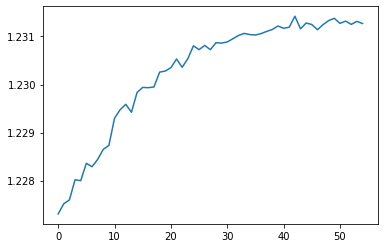

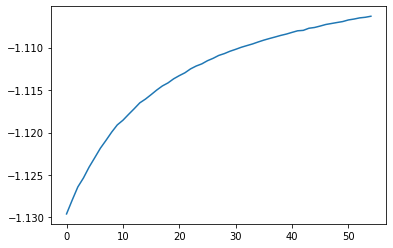

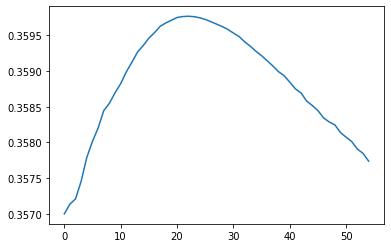

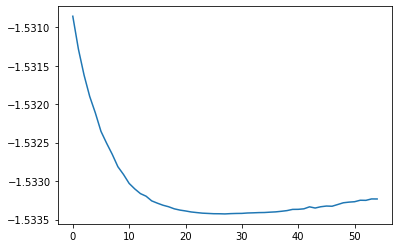

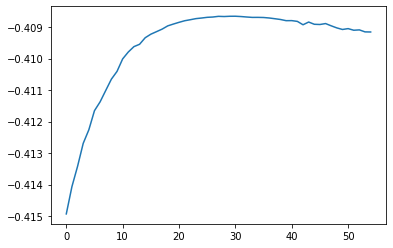

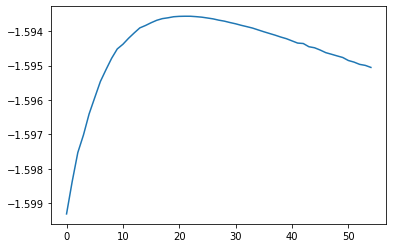

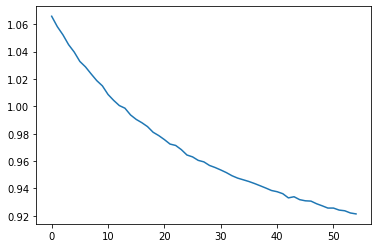

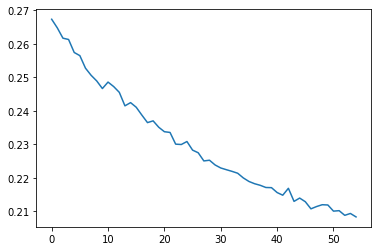

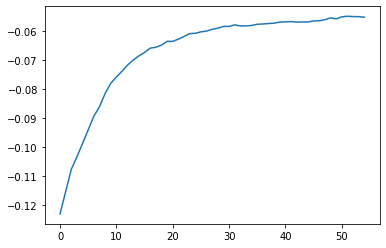

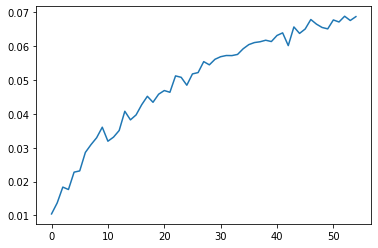

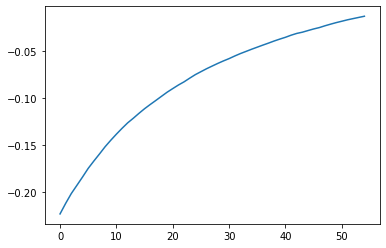

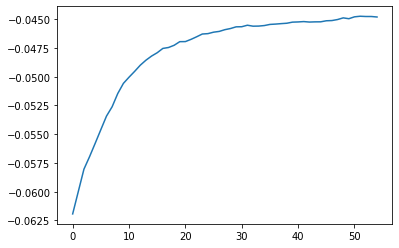

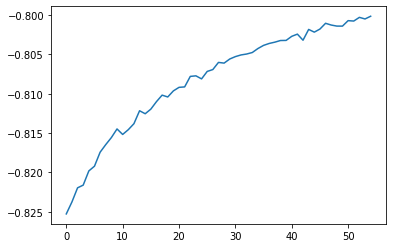

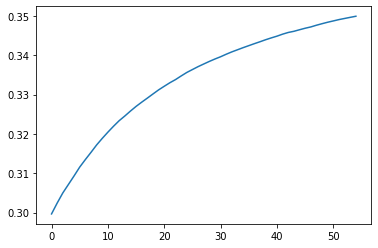

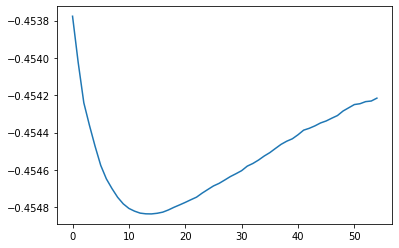

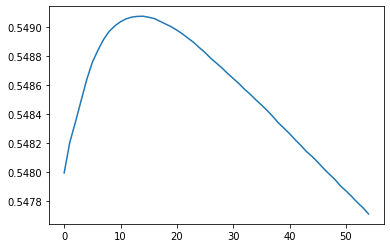

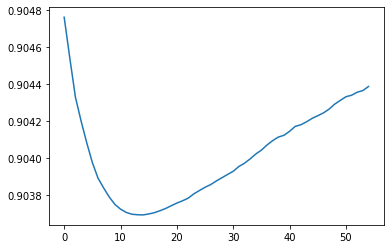

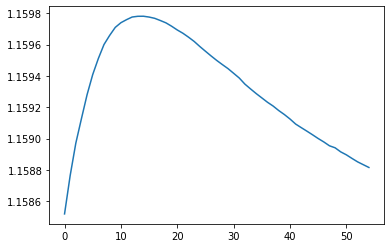

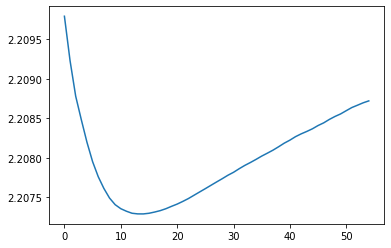

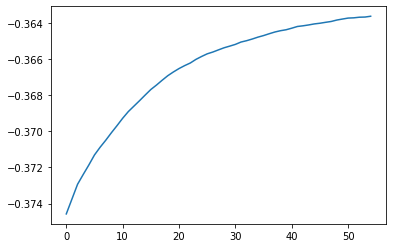

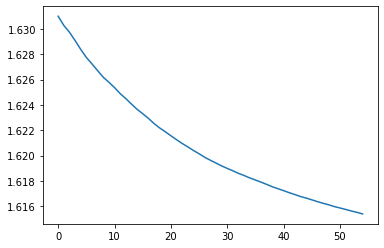

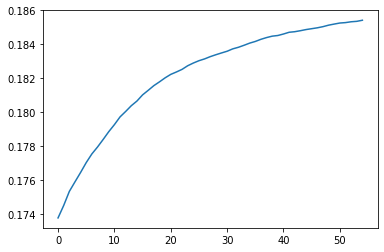

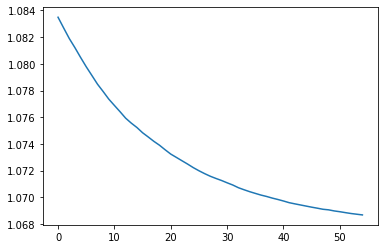

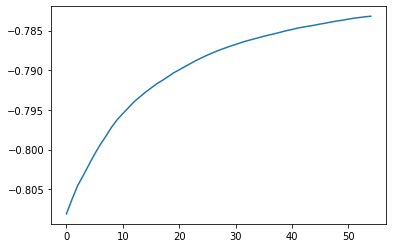

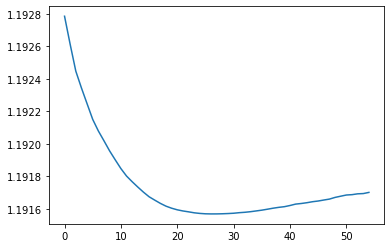

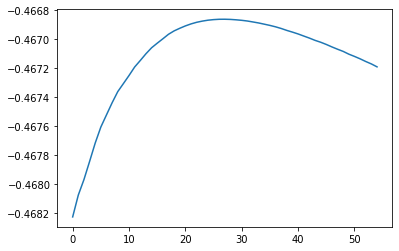

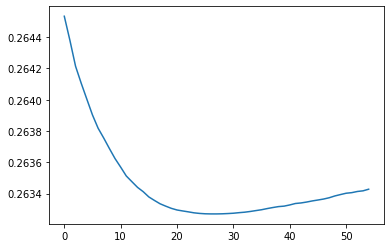

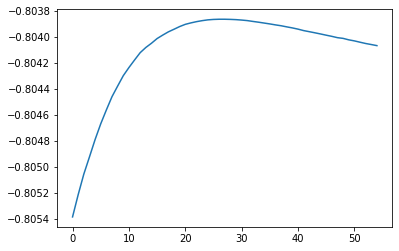

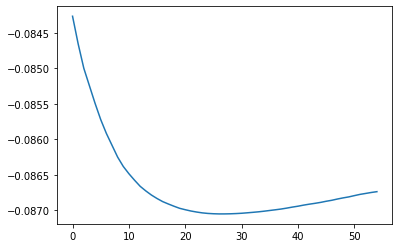

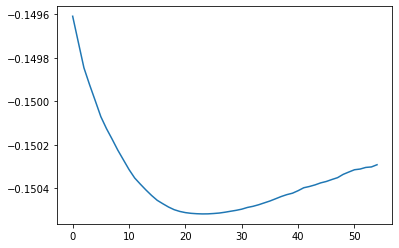

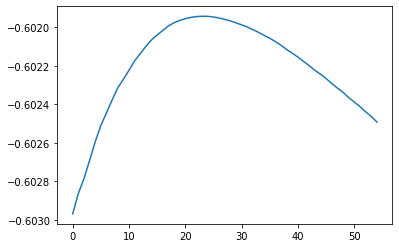

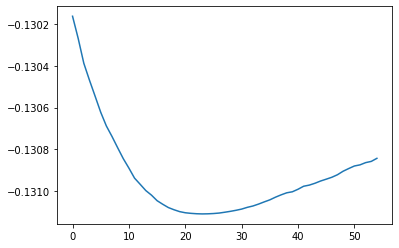

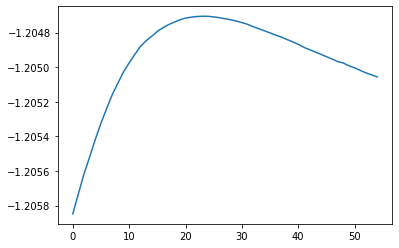

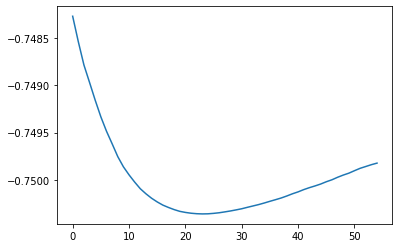

In [1023]:
for i in range(PesosEvol.shape[1]):    
    plt.figure()
    plt.plot(PesosEvol[:,i])

In [1025]:
for mod in net.modules:
    print ("Module:", mod.name) 
    if mod.paramdim > 0:
        print ("--parameters:", mod.params)
    for conn in net.connections[mod]:
        #print conn.params
        print ("-connection to", conn.outmod.name)
        if conn.paramdim > 0:
             print ("- parameters", conn.params) 
    if hasattr(net, "recurrentConns"):
        print ("Recurrent connections")
        for conn in net.recurrentConns:
            print ('nombre',conn.name)

            print ("-", conn.inmod.name, " to", conn.outmod.name)
            if conn.paramdim > 0:
                print ("- parameters", conn.params)

Module: hidden0
-connection to hidden1
- parameters [ 2.20369152  1.48393986 -1.46334224 -0.96763856  0.19702451 -0.35321064
 -0.49935272 -1.26693955 -0.49738171 -0.48836989 -0.27502076  1.51707257
 -0.49005754  0.98503584 -0.32738006 -0.080287  ]
Module: hidden1
-connection to hidden2
- parameters [ 0.57775576  0.2482303  -0.35678311 -0.98850751 -0.73457116  1.55999794
  1.2312698  -1.10630459  0.35773975 -1.53323311 -0.40915363 -1.59505542]
Module: hidden3
-connection to out
- parameters [0.92136011 0.20838247]
Module: hidden2
-connection to hidden3
- parameters [-0.05518358  0.06871449 -0.01237793 -0.04480568 -0.80014915  0.3499092 ]
Module: bias
-connection to out
- parameters [1.30350873]
-connection to hidden0
- parameters [-0.3471104   1.140069    1.94715252 -1.23228612]
-connection to hidden1
- parameters [1.22955977 0.31747018 0.52685209 0.19788205]
-connection to hidden2
- parameters [-0.53929591 -1.80447106  1.4051369 ]
-connection to hidden3
- parameters [-1.77670326 -1.217

### Evaluar la red

In [1047]:
resultado=[]
for i in range(len(test_u)):
    resultado.append(net.activate((test_u[i],test_v[i],test_w[i],test_T[i],test_q[i])))
len(resultado)

101

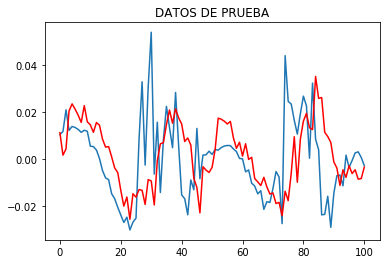

In [1049]:
plt.figure(2)
plt.title('prueba')
plt.plot(test_H)
plt.plot(resultado, color='red')
plt.title('DATOS DE PRUEBA');

### Guardar la red

In [1026]:
path_redes = r"/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/VF1/FlujosTurbulentos/Redes/"


In [1028]:
configuracion = 'escalado en [-0.1, 0.1], hidden y out con LinearLayer, 55 iteraciones, capas = (5,4,4,3,2,1)'
configuracion2 = 'VarE: u,v,w,T,q y VarS = H'
namenet = 'net8'
Pesos = pd.DataFrame(PesosEvol)
error = pd.DataFrame(errors)

In [1029]:
#Guardar y llamar una red
NetworkWriter.writeToFile(net, path_redes+namenet+'.xml')
# net = NetworkReader.readFrom('filename.xml')

In [1030]:
#Crear un archivo excel

writer = pd.ExcelWriter(path_redes+namenet+'.xlsx', engine = 'xlsxwriter')
error.to_excel(writer, sheet_name = 'Errores')
Pesos.to_excel(writer, sheet_name = 'Pesos')
worksheet = writer.sheets['Errores']
worksheet.write(0, 3, configuracion)
worksheet.write(1, 3, configuracion2)

writer.save()


### Lectura de una red

In [1031]:
netnamecall = 'net8'

In [1032]:
net7 = NetworkReader.readFrom(path_redes+netnamecall+'.xml')

In [1033]:
p = net7.activateOnDataset(dsCalib)

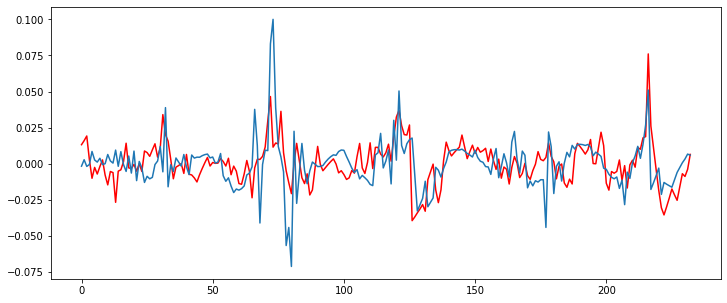

In [1034]:
plt.figure(figsize = (12,5))
plt.plot(p, 'r')
plt.plot(train_H)

In [1037]:
type(train_H)

numpy.ndarray

In [1039]:
ss.spearmanr(p,train_H)

SpearmanrResult(correlation=0.3902837702970899, pvalue=6.747877859502549e-10)

In [1040]:
ss.pearsonr(p,train_H)

TypeError: No loop matching the specified signature and casting was found for ufunc add

(100, 233, 3)


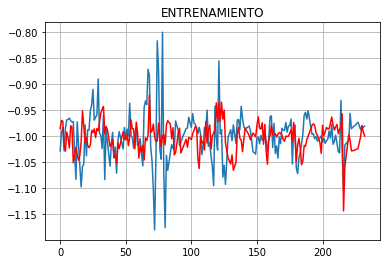

In [665]:
#LE anomalía, sin ciclo diario, linear capas internas y salida, escalado negativo, (5,3,2,1)
print(activacion.shape)

plt.figure()
plt.title('ENTRENAMIENTO')
plt.plot(train_M)
plt.plot(activacion[99,:,0], color='red')
plt.grid()

(100, 233, 3)


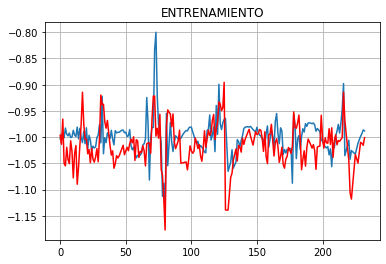

In [666]:
#LE anomalía, sin ciclo diario, linear capas internas y salida, escalado negativo, (5,3,2,1) con 0.2
print(activacion.shape)

plt.figure()
plt.title('ENTRENAMIENTO')
plt.plot(train_H)
plt.plot(activacion[99,:,1], color='red')
plt.grid()

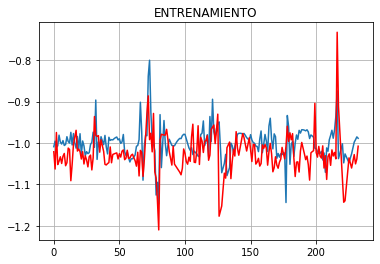

In [667]:
plt.figure()
plt.title('ENTRENAMIENTO')
plt.plot(train_LE)
plt.plot(activacion[99,:,2], color='red')
plt.grid()

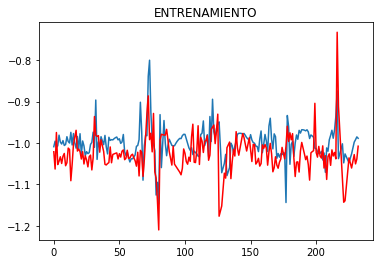

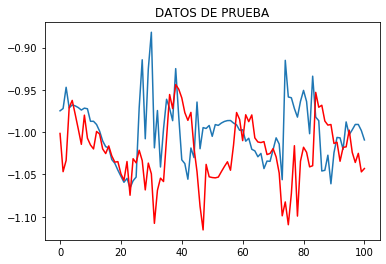

In [690]:
netSim_train = net.activateOnDataset(dsCalib)


resultado1=[]
resultado2=[]
resultado3=[]


for i in range(len(test_u)):
    resultadoM,resultadoH,resultadoLE = net.activate((test_u[i],test_v[i],test_w[i],test_T[i],test_q[i]))
    resultado1.append(resultadoM)
    resultado2.append(resultadoH)
    resultado3.append(resultadoLE)

plt.figure(1)
plt.title('ENTRENAMIENTO')
plt.plot(train_LE)
plt.plot(netSim_train[:,2], color='red')

plt.figure(2)
plt.title('prueba')
plt.plot(test_LE)
plt.plot(resultado3, color='red')
plt.title('DATOS DE PRUEBA');

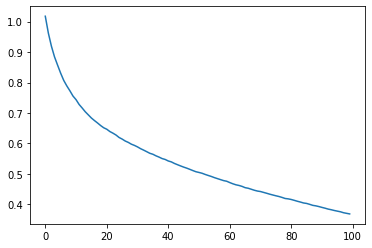

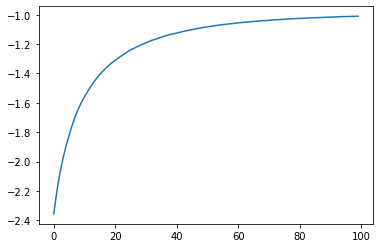

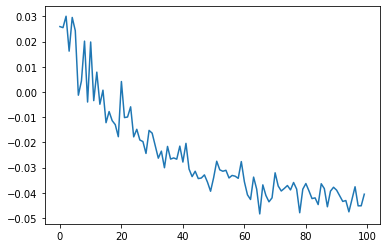

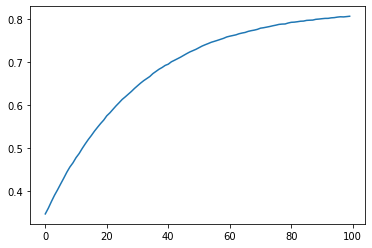

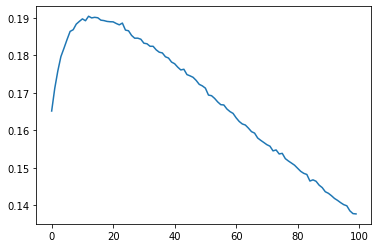

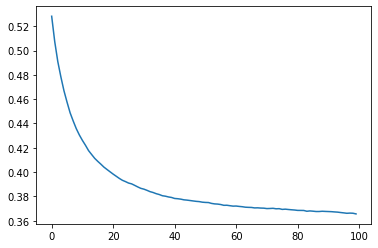

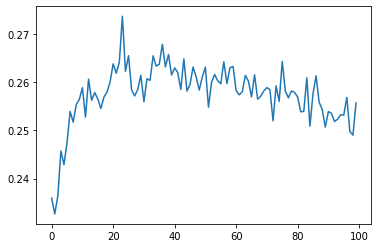

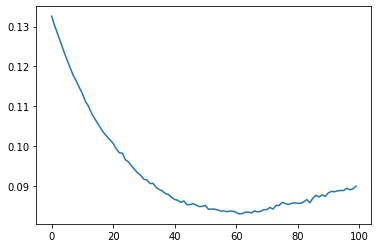

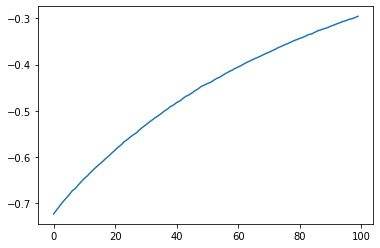

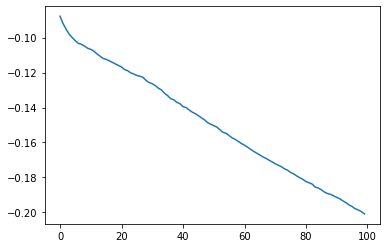

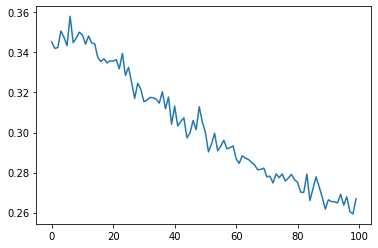

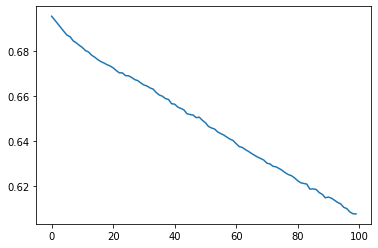

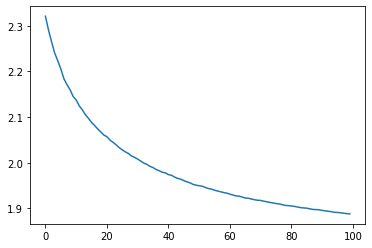

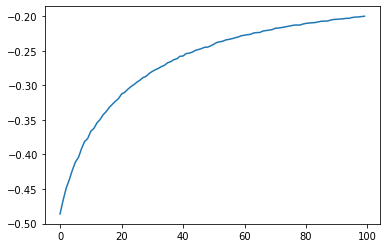

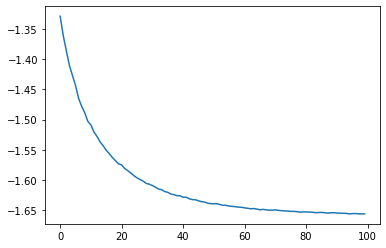

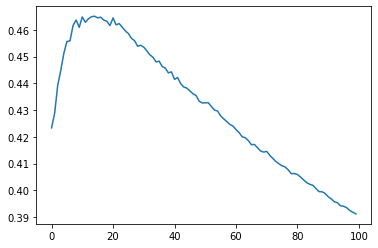

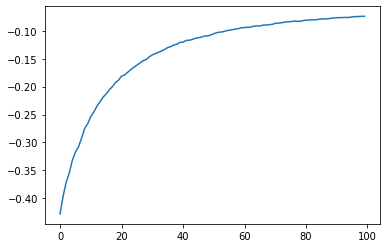

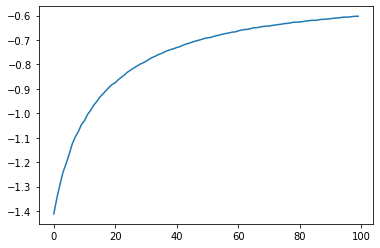

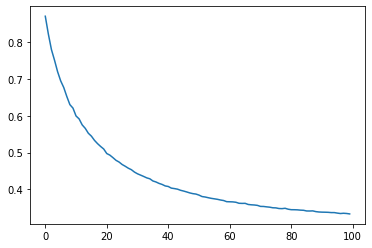

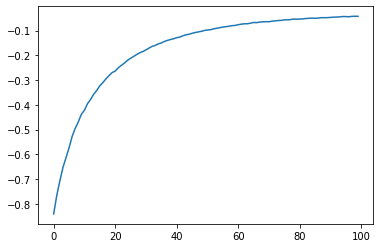

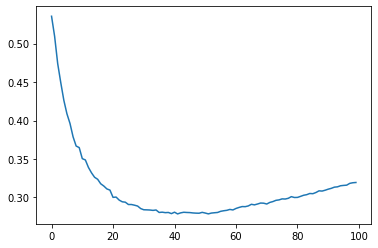

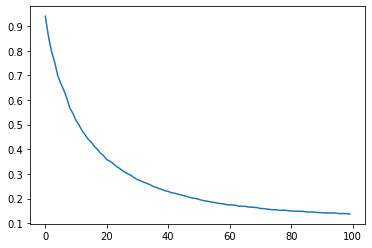

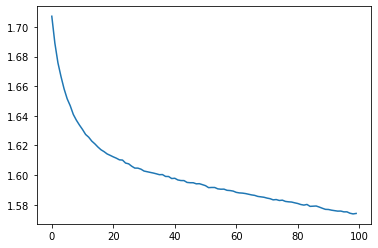

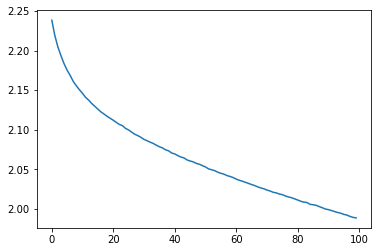

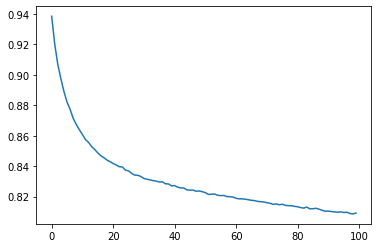

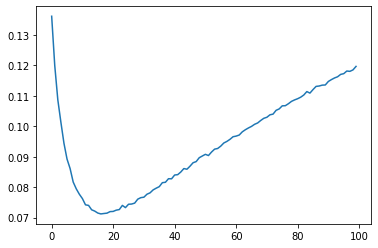

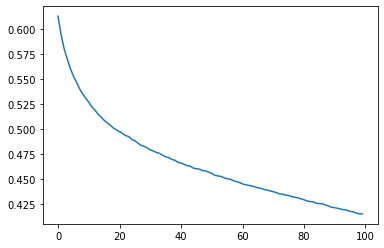

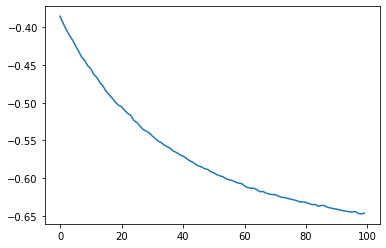

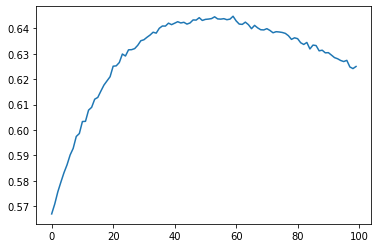

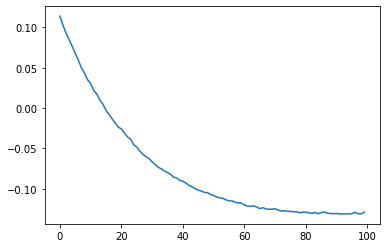

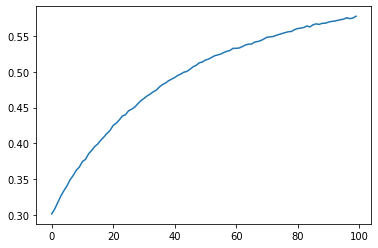

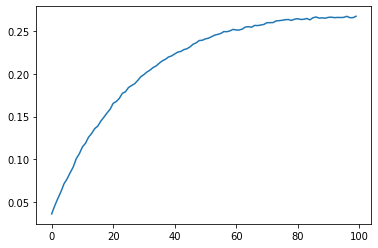

In [696]:
for i in range(PesosEvol.shape[1]):    
    plt.figure()
    plt.plot(PesosEvol[:,i])

In [ ]:
#Guardar y llamar una red
NetworkWriter.writeToFile(net, 'filename.xml')
net = NetworkReader.readFrom('filename.xml')

# Tensores de Reynolds

##Triángulos de Lumley

In [209]:
def TLumley (u,v,w,minutes,freq, percentage,ruta):
    
    '''
    Input: 
    u,v,w: Series de anomalias de las componentes del viento [m/s]
    minutes: Tiempo de promedio para el tensor de Reynolds [minutos]
    freq: Frecuencia de muestre de datos [Hz]
    percentage: Porcentaje admisible de NaNs en el set de promediado [rad]
    ruta: Ruta para guardar los triángulos
    
    Output:
    Tensor de Reynolds
    Tensor de Reynolds estandarizado
    Valores propios de cada tensor
    Invariantes eta y xi para cada tensor
    Guarda los mapas de Lumley(normal y baricéntrico)   
    '''
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from numpy import linalg as LA
    import matplotlib.tri as mtri
    
    #Entradas del tensor de Reynolds
    e11 = u*u
    e12 = u*v
    e13 = u*w
    e21 = v*u
    e22 = v*v
    e23 = v*w
    e31 = w*u
    e32 = w*v
    e33 = w*w 
    

    Reynolds =[] #Tensores de Reynolds
    ReynoldsNoNan =[] #Tensores de Reynolds sin NaN
    Reynolds_stand = [] #Tensores de Reynolds con estandarización bij
    Reynolds_standNoNaN = [] #Tensores de Reynolds con estandarización bij sin NaN
    Eigenval = [] #Valores propios de los tensores
    EigenvalNoNaN = [] #Valores propios de los tensores sin NaN
    Invariante = [] #Invariantes del tensor estandarizado
    InvarianteNoNan = [] #Invariantes del tensor estandarizado sin NaN
    TotalNan = [] #Número de NaN en cada set promediado
    Sets_Si_porcentaje = [] #Número de sets que sí cumplen porcentaje
    Sets_No_porcentaje = [] #Número de sets que no cumplen porcentaje
#     minutes = 1 #Tiempo de promediado
    datos = int(minutes*60*freq) #Número de datos en el intervalo seleccionado
#     print(datos)
    for i in range(0,int(((len(u)/freq)/60)/minutes)): #Intervalos de 10min, si cambiar se cambia el 10 por los min de análisis
        prueba = e13[datos*i:datos*(i+1)] #Saca un conjunto de prueba para evaluar la cantidad de NAN
        nans = np.isnan(prueba)
        pos = np.where(nans == True)[0]
#         print(datos*i,datos*(i+1),'________________________________________________')
        
        if len(pos) <= datos*percentage: #Evaluar si el set tiene menor de un porcentaje dado de NaN
            TotalNan.append(len(pos))
#             print('Al menos el '+str(100-percentage*100)+'% del intervalo '+str(i)+' de '+str(minutes)+' min no es nan')
#             print('Cantidad de NaN en este set es de: '+str(len(pos)))
            
            #Flujos turbulentos de transferencia de momento
            u1u1prom = np.nanmean(e11[datos*i:datos*(i+1)]) 
            u1u2prom = np.nanmean(e12[datos*i:datos*(i+1)])
            u1u3prom = np.nanmean(e13[datos*i:datos*(i+1)])
            u2u1prom = np.nanmean(e21[datos*i:datos*(i+1)])
            u2u2prom = np.nanmean(e22[datos*i:datos*(i+1)])
            u2u3prom = np.nanmean(e23[datos*i:datos*(i+1)])
            u3u1prom = np.nanmean(e31[datos*i:datos*(i+1)])
            u3u2prom = np.nanmean(e32[datos*i:datos*(i+1)])
            u3u3prom = np.nanmean(e33[datos*i:datos*(i+1)])
            
            #Crear el tensor de Reynolds
            R = [[u1u1prom,u1u2prom,u1u3prom],[u2u1prom,u2u2prom,u2u3prom],[u3u1prom,u3u2prom,u3u3prom]]
            R = np.asarray(R)
            Reynolds.append(R)
            ReynoldsNoNan.append(R)

            #Estandarizar el tensor
            deltaK = np.identity(3)
            R_stan = R/np.sum(R.diagonal())-(1/3)*deltaK #Usando UlUl como suma de la diagonal principal
            Reynolds_stand.append(R_stan)
            Reynolds_standNoNaN.append(R_stan)

        
            #Valores propios del tensor estandarizado e invariantes
            eigenval,eigenvec = LA.eig(R_stan)
            eigen = np.asarray(sorted(eigenval, reverse = True)).real
            Eigenval.append(eigen.real)
            EigenvalNoNaN.append(eigen.real)
            
            n = np.sqrt(1/3*(eigen[0]**2+eigen[0]*eigen[1]+eigen[1]**2))
            xi = np.cbrt((-0.5*(eigen[0]*eigen[1])*(eigen[0]+eigen[1])))
            inva = np.asarray([n,xi])
            Invariante.append(inva)
            InvarianteNoNan.append(inva)
            Sets_Si_porcentaje.append(1)

        else:
            TotalNan.append(len(pos))
#             print('Existen más del '+str(percentage*100)+'% de nan en el intervalo '+str(i)+' de '+str(minutes)+' min')
#             print('Cantidad de NaN en este set es de: '+str(len(pos)))
            
            #Crear el tensor de Reynolds
            R = np.ones((3,3))*np.nan
            Reynolds.append(R)
    
            #Estandarizar el tensor
            R_stan = np.ones((3,3))*np.nan
            Reynolds_stand.append(R_stan)
            
            #Valores propios del tensor estandarizado e invariantes
            eigen = np.ones((3))*np.nan
            Eigenval.append(eigen.real)
            
            inva = np.ones((2))*np.nan
            Invariante.append(inva)
           
            Sets_No_porcentaje.append(1)
    
    
    
    NumR = len(Sets_Si_porcentaje)
    NumDeSets = len(Sets_Si_porcentaje)+len(Sets_No_porcentaje)
    print('El número de tensores de Reynolds sin NaN es de '+str(NumR))
    print('El número de tensores de Reynolds es de '+str(len(Reynolds)))
    print('El número de sets al usar intervalos de '+str(minutes)+' minutos es de '+str(NumDeSets))
    
    #Cálculo de los pesos,colores, y coordenadas baricéntricas según (Emory and Iaccarino, 2014)
    I = np.asarray(InvarianteNoNan)
    evals = np.asarray(EigenvalNoNaN)

    var = [] #Guardar coordenas de cada punto del mapa baricéntrico
    Colors=[] #Guardar los colores de cada punto
    
    #Asignación de pesos y colores
    for i,j,z in evals:
        #Los pesos C1,C2 y C3 indican los colores y permiten calcular coordenadas del mapa baricéntrico
        C1 = i-j
        C2 = 2*(j-z)
        C3 = 3*z+1
        color = [C1,C2,C3]
        Colors.append(color)
        #Coordenadas en TLumley
        Xb = C1+C3*0.5
        Yb = (np.sqrt(3)/2)*C3
        pareja = [Xb,Yb]
        var.append(pareja)
    
    #Dibujo de los mapas RGB
    eta = I[:,0]
    xi = I[:,1]
    coordinates = np.asarray(var)
    colors = np.asarray(Colors)
    
    #Bordes de baricéntrico
    x_triangle = np.asarray([0, 0.5, 1])
    y_triangle = np.asarray([0, np.sqrt(3)/2, 0])

    triangles = [[0, 1, 2]]
    triang = mtri.Triangulation(x_triangle, y_triangle, triangles)
    
    #Bordes de lumley
    x_edge = np.array([-1/6,-0.08,0,0.08,1/6,0.2,0.3,1/3])
    y_edge = np.array([1/6,1/6+0.01,1/6+0.01-0.003,1/6+0.015,0.21,0.23,0.3,1/3])

    tck = interpolate.splrep(x_edge, y_edge, s=0)
    xnew = np.arange(-1/6, 1/3,0.01)
    xnew = np.append(xnew,1/3)
    ynew = interpolate.splev(xnew, tck, der=0)

    #Coordenadas del mapa baricéntrico
    x = coordinates[:,0]
    y = coordinates[:,1]
    
    #Coordenadas de Lumley
    xl = xi
    yl = eta
    
    #Labels lumley
    labels_xl = ['-1/6','0','1/6','1/3']
    labels_yl = ['0','1/6','1/3']
    
    #Labels baricentrico
    labels_x = ['0','1/2','1']
    labels_y = ['0','$\sqrt{3}/6$','$\sqrt{3}/2$']
    
    #Mapa lumley
    plt.figure(figsize = [5.7,5.8])
    plt.plot(xnew, ynew,'k-',[-1/6,0],[1/6,0],'k-o',[0,1/3],[0,1/3],'k-o')
    plt.scatter(xl,yl , c=colors,s = 10, cmap='RdBb', alpha=0.8)
    plt.xticks((-1/6,0,1/6,1/3), labels = labels_xl)
    plt.yticks((0,1/6,1/3), labels = labels_yl)
    plt.text(1/3-0.01,1/3,'1-componente',horizontalalignment='right',fontsize = 12)
    plt.text(0,1/6+0.03,'2 componentes',horizontalalignment='center',verticalalignment='center', fontsize = 12)
    plt.text(-1/6-0.01,1/6-0.02,'2 componentes\naxisimétricas',horizontalalignment='center',verticalalignment='bottom',\
             rotation = 58,fontsize = 12)
    plt.text(-1/12-0.03,1/12,'axisimétrico(\u03BE<0)',horizontalalignment='center',verticalalignment='center',\
             rotation = -58.5,fontsize = 12)
    plt.text(1/12+0.03,1/12,'axisimétrico(\u03BE>0)',horizontalalignment='center',verticalalignment='center',\
             rotation = 58.5,fontsize = 12)    
    plt.text(0,-0.01,'Isotrópico',horizontalalignment='center',verticalalignment='top',fontsize = 12)
    plt.ylabel('Invariante \u03B7',fontsize = 14, fontweight='bold')
    plt.xlabel('Invariante \u03BE',fontsize = 14, fontweight='bold')
    plt.title('Mapa de Lumley con promedios cada '+str(minutes)+' minutos',fontsize = 14)
    plt.axis([-1/6-0.1, 1/3+0.01,-0.03, 1/3+0.03])
#     plt.savefig(str(ruta)+'MLumley_'+str(minutes)+'.png',dpi=500,bbox_inches='tight')
    
    #Mapa baricéntrico
    plt.figure(figsize = [5.9,4.5])
    plt.scatter(x,y , c=colors,s = 10, cmap='RdBb', alpha=0.8)
    plt.triplot(triang, 'ko-')
    plt.xticks((0, 1/2, 1), labels = labels_x)
    plt.yticks((0, np.sqrt(3)/6 ,np.sqrt(3)/2 ), labels = labels_y)
    plt.text(1/2,np.sqrt(3)/2+0.02,'Isotrópico',horizontalalignment='center',verticalalignment='bottom', fontsize = 12)
    plt.text(0,-0.07,'2 componentes\naxisimétricas',horizontalalignment='center',verticalalignment='center', fontsize = 12)
    plt.text(1,-0.07,'1-componente',horizontalalignment='center',verticalalignment='center', fontsize = 12)
    plt.title('Mapa baricéntrico de Lumley con promedios cada '+str(minutes)+' minutos', fontsize = 14)
    plt.xlabel(r'$\mathbf{X_{B}}$', fontsize = 14)
    plt.ylabel(r'$\mathbf{Y_{B}}$', fontsize = 14,rotation = 0)
    plt.axis([-0.25,1.25,-0.14,np.sqrt(3)/2+0.09])
#     plt.savefig(str(ruta)+'MBarLumley_'+str(minutes)+'.png',dpi=500,bbox_inches='tight')

    return (np.asarray(Reynolds),np.asarray(Reynolds_stand),np.asarray(Eigenval),np.asarray(Invariante),\
           np.asarray(ReynoldsNoNan),np.asarray(Reynolds_standNoNaN),np.asarray(EigenvalNoNaN),np.asarray(InvarianteNoNan))

El número de tensores de Reynolds sin NaN es de 9092
El número de tensores de Reynolds es de 11520
El número de sets al usar intervalos de 1 minutos es de 11520
El número de tensores de Reynolds sin NaN es de 1778
El número de tensores de Reynolds es de 2304
El número de sets al usar intervalos de 5 minutos es de 2304
El número de tensores de Reynolds sin NaN es de 848
El número de tensores de Reynolds es de 1152
El número de sets al usar intervalos de 10 minutos es de 1152
El número de tensores de Reynolds sin NaN es de 310
El número de tensores de Reynolds es de 384
El número de sets al usar intervalos de 30 minutos es de 384


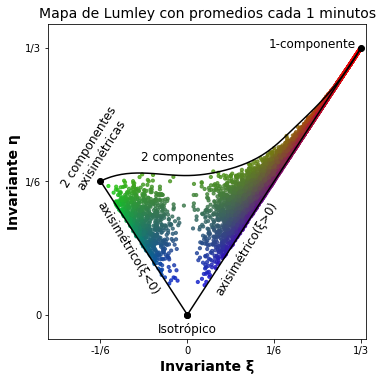

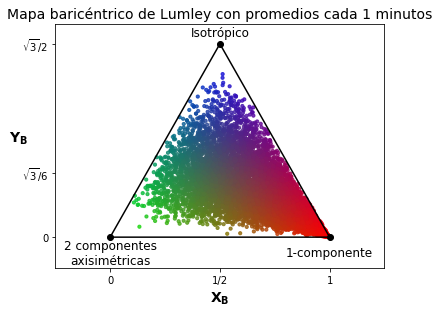

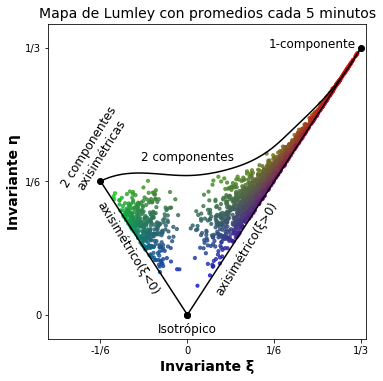

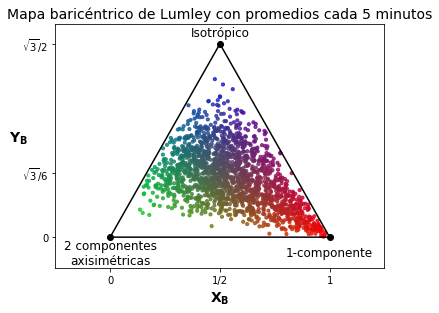

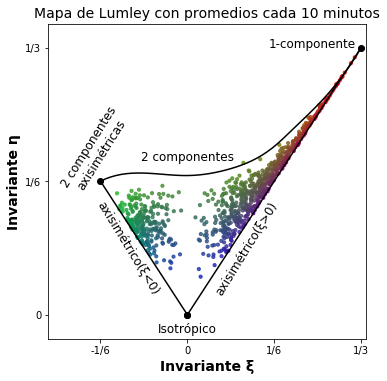

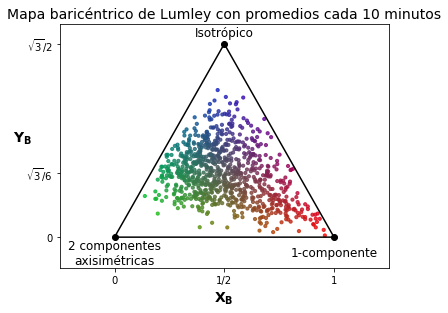

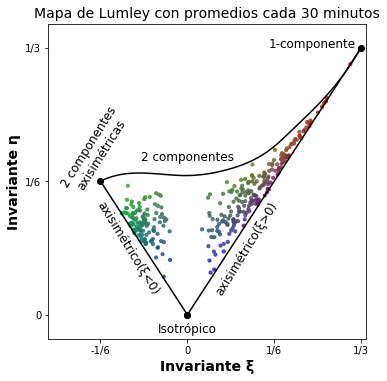

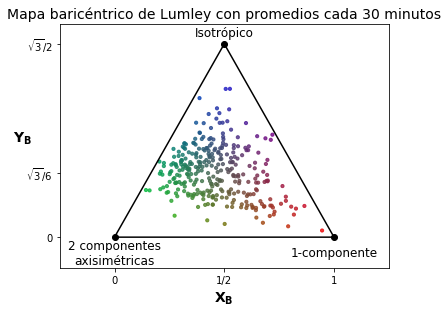

In [210]:
R1,RS1,E1,I1,R1NoNan,RS1NoNan,E1NoNan,I1NoNan = TLumley(u,v,w,1,20,0.1,ruta)
R5,RS5,E5,I5,R5NoNan,RS5NoNan,E5NoNan,I5NoNan = TLumley(u,v,w,5,20,0.1,ruta)
R10,RS10,E10,I10,R10NoNan,RS10NoNan,E10NoNan,I10NoNan = TLumley(u,v,w,10,20,0.1,ruta)
R30,RS30,E30,I30,R30NoNan,RS30NoNan,E30NoNan,I30NoNan = TLumley(u,v,w,30,20,0.1,ruta)

In [25]:
#rc[2]['e33']

array([nan, nan, nan, ..., nan, nan, nan])

In [214]:
print(len(R30),len(RS30),len(E30),len(I30),len(R30NoNan),len(RS30NoNan),len(E30NoNan),len(I30NoNan) )

384 384 384 384 310 310 310 310


## Análisis de tensores con EOF

### EOFs multivariado para distintos tiempo

In [219]:
def EOFTensor(A,minutes,porcentaje, ruta):
    """
    Input
    A: Matriz con variables en columnas y tiempo en filas
    minutes: Tiempo de promediado de las variables
    porcentaje: Porcentaje de participación mínimo del modo x
    ruta: Ruta para guardar resultado
    """
    U,S,Vh = np.linalg.svd(A, full_matrices=True)
    print(U.shape, S.shape,Vh.shape)
    
    #Porcentaje de participación de cada modo
    
    porc = (S/np.sum(S))*100
    suma = 0
    cont = 0
    for p in porc:
        if p > porcentaje:
            print(p)
            suma = suma + p 
            cont += 1
    print('La explicación de varianza con modos con más del 5% es de '+str(suma)+'%')
    plt.figure()
    plt.plot(porc, 'o', c = 'r', ls = '--', lw = 1)
    plt.xlabel('Modos')
    plt.ylabel('Porcentaje de importancia [%]')
    plt.title('Aporte a variablidad de cada modo, en sets de '+str(minutes)+' minutos')
    plt.xlim(0,cont+2)
    plt.grid()
#     plt.savefig(ruta+'Porc_'+str(minutes)+'.png',dpi=500,bbox_inches='tight')
    
    #Componentes principales
    for i in range(0,cont):
        plt.figure()
        color = ['r','k','b','y','g','orchid','rosybrown', 'firebrick','royalblue','goldenrod','c','pink','navy']
        plt.plot(U[:,i], c = color[i], ls = '-' , label = 'PC '+str(i+1))
        plt.title('PC '+str(i+1)+' para sets de '+str(minutes)+' minutos')
        plt.grid()
#         plt.savefig(ruta+'Pc'+str(i)+'_'+str(minutes)+'.png',dpi=500,bbox_inches='tight')
        
    #EOFs
    EOFss = np.zeros([cont,3,3])

    for j in range(cont):
        E = np.reshape(Vh[j,:],[3,3])
        EOFss[j,:,:] = E

        X_newton = ['$\overline{U^{´}_{1}}$', '$\overline{U^{´}_{2}}$', '$\overline{U^{´}_{3}}$' ]
        Y_newton = ['$\overline{U^{´}_{1}}$', '$\overline{U^{´}_{2}}$', '$\overline{U^{´}_{3}}$' ]
        entradas_newton = [['$\overline{U^{´}_{1}U^{´}_{1}}$', '$\overline{U^{´}_{1}U^{´}_{2}}$',\
                   '$\overline{U^{´}_{1}U^{´}_{3}}$'],['$\overline{U^{´}_{2}U^{´}_{1}}$',\
                   '$\overline{U^{´}_{2}U^{´}_{2}}$', '$\overline{U^{´}_{2}U^{´}_{3}}$'],\
                   ['$\overline{U^{´}_{3}U^{´}_{1}}$','$\overline{U^{´}_{3}U^{´}_{2}}$',\
                   '$\overline{U^{´}_{3}U^{´}_{3}}$']]
        
        X = ['$\overline{U}$', '$\overline{V}$', '$\overline{W}$' ]
        Y = ['$\overline{U}$', '$\overline{V}$', '$\overline{W}$' ]
        entradas = [['$\overline{U U}$', '$\overline{U V}$',\
                   '$\overline{U_{  }W}$'],['$\overline{V_{  }U}$',\
                   '$\overline{V_{  }V}$', '$\overline{V_{  }W}$'],\
                   ['$\overline{W U}$','$\overline{W_{  }V}$',\
                   '$\overline{W_{  }W}$']]
        
        entradas_newton = np.asarray(entradas_newton)
        entradas = np.asarray(entradas)
        fig, ax = plt.subplots()
        im = ax.imshow(E,vmin=-1, vmax=1, cmap='seismic')
        ax.figure.colorbar(im)

        # We want to show all ticks...
        ax.set_xticks(np.arange(len(X)))
        ax.set_yticks(np.arange(len(Y)))
        # ... and label them with the respective list entries
        ax.set_xticklabels(X)
        ax.set_yticklabels(Y)
        #Don't show ticks
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())
        #Title
        ax.set_title('EOF '+str(j+1)+' para sets de '+str(minutes)+' minutos')


        # Loop over data dimensions and create text annotations.
        for m in range(len(Y)):
            for k in range(len(X)):
                text = ax.text(k, m, entradas[m, k],
                               ha="center", va="center", color="k")
#         fig.savefig(ruta+'EOF'+str(j)+'_'+str(minutes)+'.png',dpi=500,bbox_inches='tight')


In [220]:
A1 =np.reshape(R1,[R1.shape[0],R1.shape[1]*R1.shape[2]])
A1NoNan =np.reshape(R1NoNan,[R1NoNan.shape[0],R1NoNan.shape[1]*R1NoNan.shape[2]])

A5 =np.reshape(R5,[R5.shape[0],R5.shape[1]*R5.shape[2]])
A5NoNan =np.reshape(R5NoNan,[R5NoNan.shape[0],R5NoNan.shape[1]*R5NoNan.shape[2]])

A10 =np.reshape(R10,[R10.shape[0],R10.shape[1]*R10.shape[2]])
A10NoNan =np.reshape(R10NoNan,[R10NoNan.shape[0],R10NoNan.shape[1]*R10NoNan.shape[2]])

A30 =np.reshape(R30,[R30.shape[0],R30.shape[1]*R30.shape[2]])
A30NoNan =np.reshape(R30NoNan,[R30NoNan.shape[0],R30NoNan.shape[1]*R30NoNan.shape[2]])

A =np.asarray([[A1,A5,A10,A30],[1,5,10,30]])
ANoNan =np.asarray([[A1NoNan,A5NoNan,A10NoNan,A30NoNan],[1,5,10,30]])

print(A.shape,ANoNan.shape)


(2, 4) (2, 4)


(9092, 9092) (9,) (9, 9)
39.01161909641597
22.01066736366536
18.707133377263908
8.229619346822401
7.494584075574698
La explicación de varianza con modos con más del 5% es de 95.45362325974233%
(1778, 1778) (9,) (9, 9)
47.15578876818552
20.627143219150017
15.670385361024843
6.874024098948158
5.794897849518319
La explicación de varianza con modos con más del 5% es de 96.12223929682686%


/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

(848, 848) (9,) (9, 9)
51.962657181527206
18.668382542543334
13.991699404643235
6.567759189018762
5.155359781589309
La explicación de varianza con modos con más del 5% es de 96.34585809932186%
(310, 310) (9,) (9, 9)
57.35021292122019
16.64767450108522
12.113019278245961
6.054766779516467
La explicación de varianza con modos con más del 5% es de 92.16567348006784%


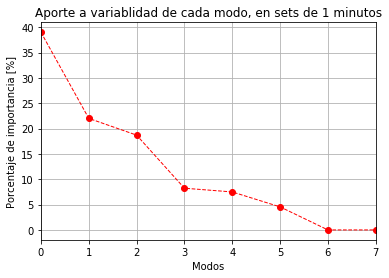

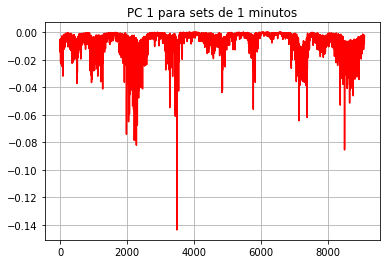

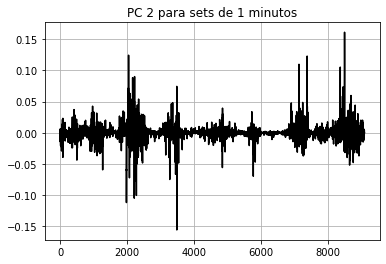

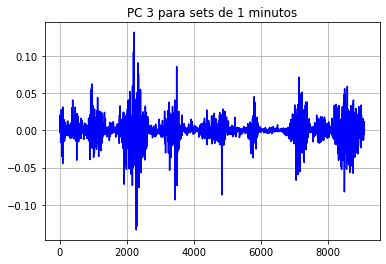

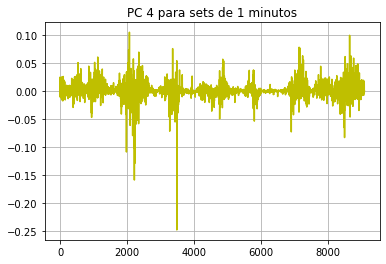

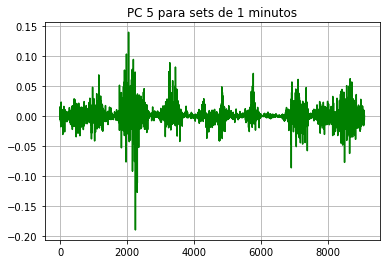

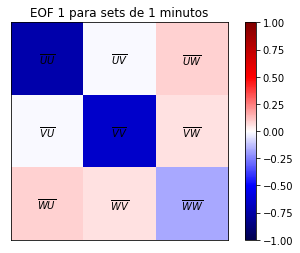

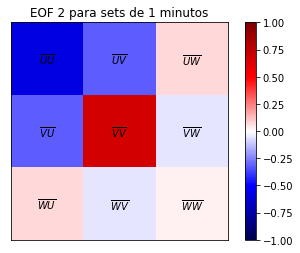

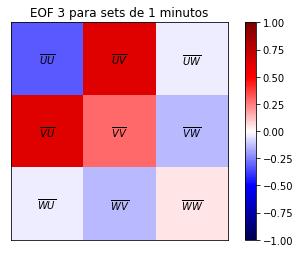

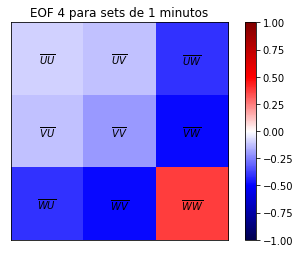

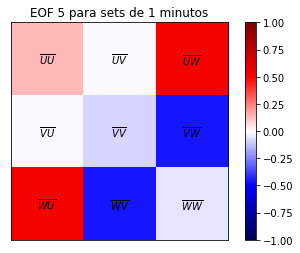

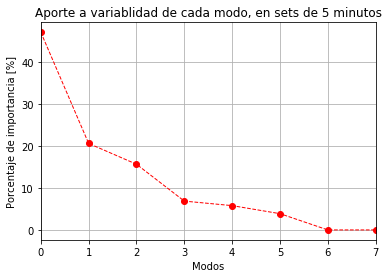

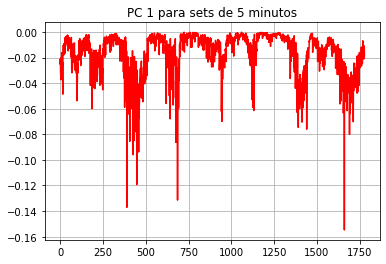

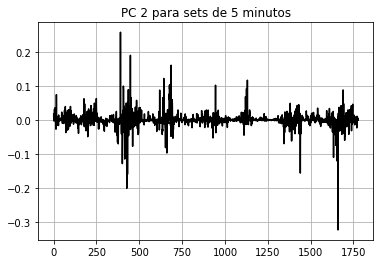

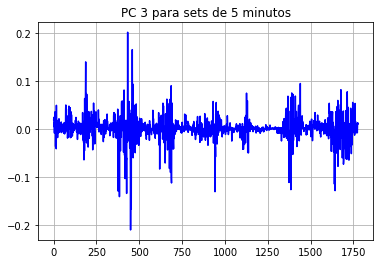

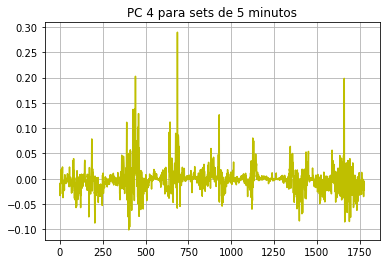

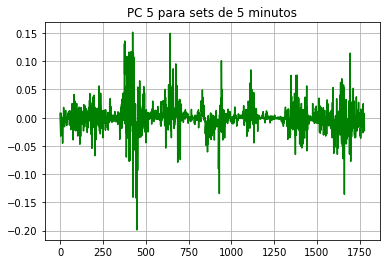

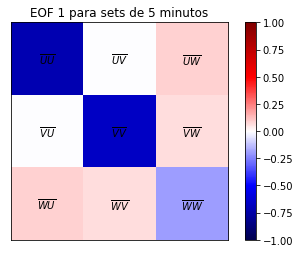

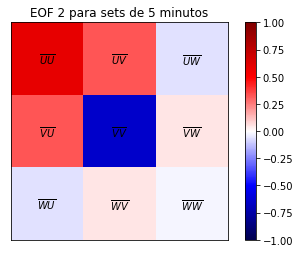

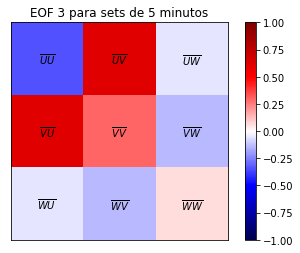

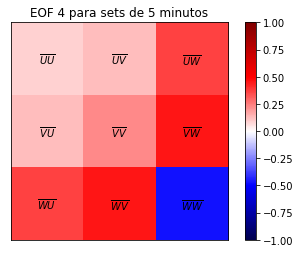

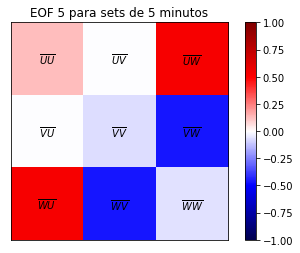

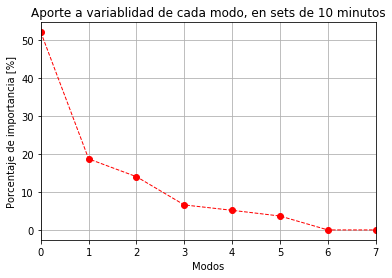

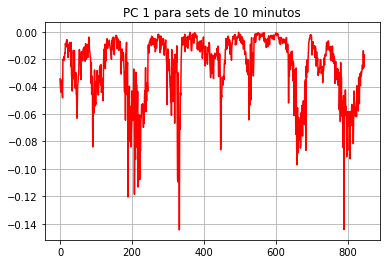

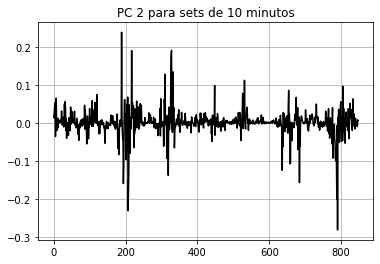

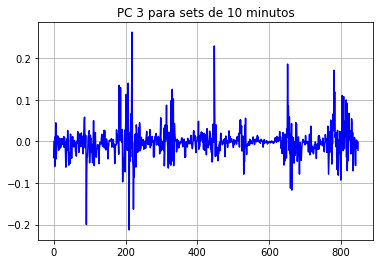

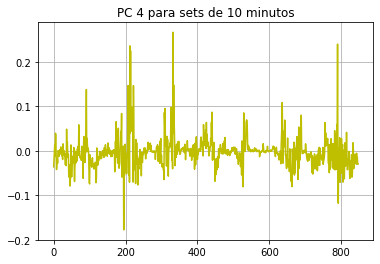

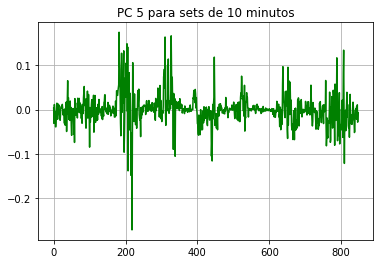

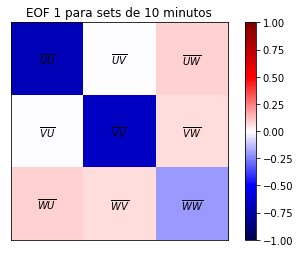

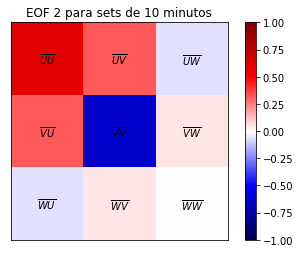

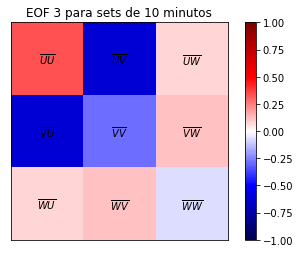

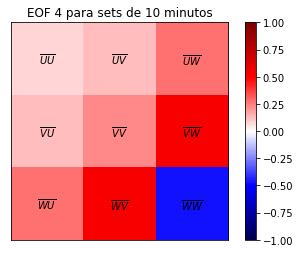

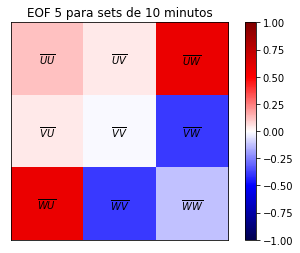

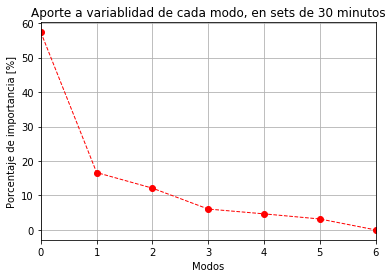

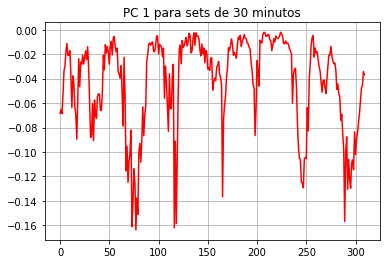

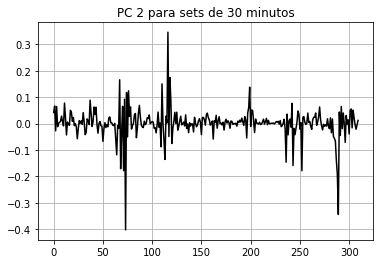

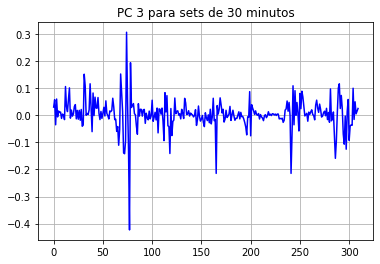

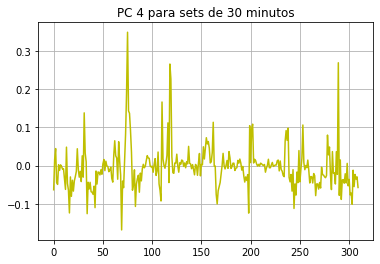

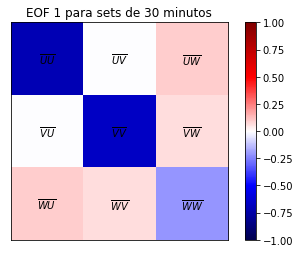

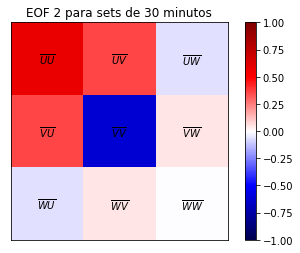

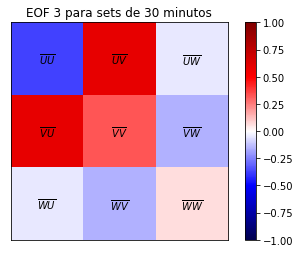

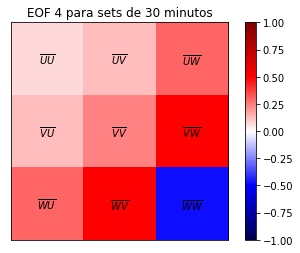

In [14]:
for i in range(ANoNan.shape[1]):
    EOFTensor(ANoNan[0,i],ANoNan[1,i],5,ruta)

#### Guardar reynolds

In [224]:
a = pd.DataFrame(A30[0:4,:])
a

0         1         2         3         4         5         6  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  1.813770  0.269763 -0.417776  0.269763  1.340961 -0.204775 -0.417776   
3  1.853362  0.519705 -0.266909  0.519705  1.251125 -0.119886 -0.266909   

          7         8  
0       NaN       NaN  
1       NaN       NaN  
2 -0.204775  0.681821  
3 -0.119886  0.521601

In [226]:
r = pd.DataFrame(R30[3,:,:])
r

0         1         2
0  1.853362  0.519705 -0.266909
1  0.519705  1.251125 -0.119886
2 -0.266909 -0.119886  0.521601

In [15]:
writer = pd.ExcelWriter(ruta+'Reynolds_VF1.xlsx',engine = 'xlsxwriter')
writer2 = pd.ExcelWriter(ruta+'ReynoldsNoNan_VF1.xlsx',engine = 'xlsxwriter')


A1pd = pd.DataFrame(A1)
A1NoNanpd = pd.DataFrame(A1NoNan)

A5pd = pd.DataFrame(A5)
A5NoNanpd = pd.DataFrame(A5NoNan)

A10pd = pd.DataFrame(A10)
A10NoNanpd = pd.DataFrame(A10NoNan)

A30pd = pd.DataFrame(A30)
A30NoNanpd = pd.DataFrame(A30NoNan)

A1pd.to_excel(writer, sheet_name = 'A1')
A5pd.to_excel(writer, sheet_name = 'A5')
A10pd.to_excel(writer, sheet_name = 'A10')
A30pd.to_excel(writer, sheet_name = 'A30')
writer.save()

A1NoNanpd.to_excel(writer2, sheet_name = 'A1')
A5NoNanpd.to_excel(writer2, sheet_name = 'A5')
A10NoNanpd.to_excel(writer2, sheet_name = 'A10')
A30NoNanpd.to_excel(writer2, sheet_name = 'A30')
writer2.save()

### EOFs de todas las estaciones

#### Lectura de reynolds de las ortras estaciones

In [290]:
#CRAGAR TENSORES COMPLETOS QUE TIENEN NAN y están en matriz A
#Cada fila es un tensor y debe reorganizarse 384,3,3)

rutaVF1 = '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/VF1/'
rutaEH1 = '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/EH1/'
rutaEH2 = '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/EH2/'

A1VF1 = np.asarray(pd.read_excel(rutaVF1+'Reynolds_VF1.xlsx', sheet_name = 'A1', index_col = 'Unnamed: 0'))
A5VF1 = np.asarray(pd.read_excel(rutaVF1+'Reynolds_VF1.xlsx', sheet_name = 'A5', index_col = 'Unnamed: 0'))
A10VF1 = np.asarray(pd.read_excel(rutaVF1+'Reynolds_VF1.xlsx', sheet_name = 'A10', index_col = 'Unnamed: 0'))
A30VF1 = np.asarray(pd.read_excel(rutaVF1+'Reynolds_VF1.xlsx', sheet_name = 'A30', index_col = 'Unnamed: 0'))

A1EH1 = np.asarray(pd.read_excel(rutaEH1+'Reynolds_EH1.xlsx', sheet_name = 'A1', index_col = 'Unnamed: 0'))
A5EH1 = np.asarray(pd.read_excel(rutaEH1+'Reynolds_EH1.xlsx', sheet_name = 'A5', index_col = 'Unnamed: 0'))
A10EH1 = np.asarray(pd.read_excel(rutaEH1+'Reynolds_EH1.xlsx', sheet_name = 'A10', index_col = 'Unnamed: 0'))
A30EH1 = np.asarray(pd.read_excel(rutaEH1+'Reynolds_EH1.xlsx', sheet_name = 'A30', index_col = 'Unnamed: 0'))

A1EH2 = np.asarray(pd.read_excel(rutaEH2+'Reynolds_EH2.xlsx', sheet_name = 'A1', index_col = 'Unnamed: 0'))
A5EH2 = np.asarray(pd.read_excel(rutaEH2+'Reynolds_EH2.xlsx', sheet_name = 'A5', index_col = 'Unnamed: 0'))
A10EH2 = np.asarray(pd.read_excel(rutaEH2+'Reynolds_EH2.xlsx', sheet_name = 'A10', index_col = 'Unnamed: 0'))
A30EH2 = np.asarray(pd.read_excel(rutaEH2+'Reynolds_EH2.xlsx', sheet_name = 'A30', index_col = 'Unnamed: 0'))

#CARGAR TENSORES SIN NAN, ESTÁN EN FORMATO MATRIZ A

rutaVF1NoNan = '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/VF1/'
rutaEH1NoNan = '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/EH1/'
rutaEH2NoNan = '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/EH2/'

A1VF1NoNan = np.asarray(pd.read_excel(rutaVF1NoNan+'ReynoldsNoNan_VF1.xlsx', sheet_name = 'A1', index_col = 'Unnamed: 0'))
A5VF1NoNan = np.asarray(pd.read_excel(rutaVF1NoNan+'ReynoldsNoNan_VF1.xlsx', sheet_name = 'A5', index_col = 'Unnamed: 0'))
A10VF1NoNan = np.asarray(pd.read_excel(rutaVF1NoNan+'ReynoldsNoNan_VF1.xlsx', sheet_name = 'A10', index_col = 'Unnamed: 0'))
A30VF1NoNan = np.asarray(pd.read_excel(rutaVF1NoNan+'ReynoldsNoNan_VF1.xlsx', sheet_name = 'A30', index_col = 'Unnamed: 0'))

A1EH1NoNan = np.asarray(pd.read_excel(rutaEH1NoNan+'ReynoldsNoNan_EH1.xlsx', sheet_name = 'A1', index_col = 'Unnamed: 0'))
A5EH1NoNan = np.asarray(pd.read_excel(rutaEH1NoNan+'ReynoldsNoNan_EH1.xlsx', sheet_name = 'A5', index_col = 'Unnamed: 0'))
A10EH1NoNan = np.asarray(pd.read_excel(rutaEH1NoNan+'ReynoldsNoNan_EH1.xlsx', sheet_name = 'A10', index_col = 'Unnamed: 0'))
A30EH1NoNan = np.asarray(pd.read_excel(rutaEH1NoNan+'ReynoldsNoNan_EH1.xlsx', sheet_name = 'A30', index_col = 'Unnamed: 0'))

A1EH2NoNan = np.asarray(pd.read_excel(rutaEH2NoNan+'ReynoldsNoNan_EH2.xlsx', sheet_name = 'A1', index_col = 'Unnamed: 0'))
A5EH2NoNan = np.asarray(pd.read_excel(rutaEH2NoNan+'ReynoldsNoNan_EH2.xlsx', sheet_name = 'A5', index_col = 'Unnamed: 0'))
A10EH2NoNan = np.asarray(pd.read_excel(rutaEH2NoNan+'ReynoldsNoNan_EH2.xlsx', sheet_name = 'A10', index_col = 'Unnamed: 0'))
A30EH2NoNan = np.asarray(pd.read_excel(rutaEH2NoNan+'ReynoldsNoNan_EH2.xlsx', sheet_name = 'A30', index_col = 'Unnamed: 0'))

#### EOF con A = [VF1|EH1|EH2]

In [291]:
print('Matrices A con tensores de reynolds incluyendo tensores de NaN')
print(A1VF1.shape,A1EH1.shape,A1EH2.shape)
print(A5VF1.shape,A5EH1.shape,A5EH2.shape)
print(A10VF1.shape,A10EH1.shape,A10EH2.shape)
print(A30VF1.shape,A30EH1.shape,A30EH2.shape)
print()
print('Matrices A con tensores de reynolds sin tensores de NaN')

print(A1VF1NoNan.shape,A1EH1NoNan.shape,A1EH2NoNan.shape)
print(A5VF1NoNan.shape,A5EH1NoNan.shape,A5EH2NoNan.shape)
print(A1VF1NoNan.shape,A10EH1NoNan.shape,A10EH2NoNan.shape)
print(A30VF1NoNan.shape,A30EH1NoNan.shape,A30EH2NoNan.shape)

Matrices A con tensores de reynolds incluyendo tensores de NaN
(11520, 9) (11520, 9) (11520, 9)
(2304, 9) (2304, 9) (2304, 9)
(1152, 9) (1152, 9) (1152, 9)
(384, 9) (384, 9) (384, 9)

Matrices A con tensores de reynolds sin tensores de NaN
(9092, 9) (11028, 9) (11260, 9)
(1778, 9) (2203, 9) (2249, 9)
(9092, 9) (1100, 9) (1121, 9)
(310, 9) (368, 9) (376, 9)


In [292]:
def MatrizAConjunta(AVF1,AEH1,AEH2,t,o):
    A = pd.DataFrame()
    TiempoSinCoincidencia = pd.DataFrame()
    for i in range(0,AVF1.shape[0]):
        
        delta =(i+1)*t
        
        vector = np.isnan([AVF1[i,0], AEH1[i,0], AEH2[i,0]])
        numNan = len(np.where(vector == True)[0])
        numNoNan = len(np.where(vector == False)[0])
        tiempo = [datetime(2019,12,27,0,0,0)+ timedelta(minutes = delta)]
        
        Combinaciones = [[AVF1[i,:], AEH1[i,:], AEH2[i,:]], [AVF1[i,:], AEH2[i,:], AEH1[i,:]], \
                         [AEH1[i,:], AVF1[i,:], AEH2[i,:]], [AEH1[i,:], AEH2[i,:], AVF1[i,:]],\
                         [AEH2[i,:], AVF1[i,:], AEH1[i,:]], [AEH2[i,:], AEH1[i,:], AVF1[i,:]]]
        if (numNoNan == 3):
            A = A.append(pd.DataFrame(np.reshape(np.asarray(Combinaciones[o]),(1,27)),\
                                  index = tiempo))
        else:    
            TiempoSinCoincidencia=TiempoSinCoincidencia.append(tiempo)
            
    return(A, TiempoSinCoincidencia)       

In [293]:
A1, TiempoSinCoincidencia1 = MatrizAConjunta(A1VF1,A1EH1,A1EH2,1,0)
A5, TiempoSinCoincidencia5 = MatrizAConjunta(A5VF1,A5EH1,A5EH2,5,0)
A10, TiempoSinCoincidencia10 = MatrizAConjunta(A10VF1,A10EH1,A10EH2,10,0)
A30, TiempoSinCoincidencia30 = MatrizAConjunta(A30VF1,A30EH1,A30EH2,30,0)

In [294]:
print(A1.shape, A5.shape, A10.shape,A30.shape)
print(TiempoSinCoincidencia1.shape, TiempoSinCoincidencia5.shape, TiempoSinCoincidencia10.shape,TiempoSinCoincidencia30.shape)

(9007, 27) (1762, 27) (841, 27) (307, 27)
(2513, 1) (542, 1) (311, 1) (77, 1)


In [302]:
def EOFTensorMax(A,minutes,porcentaje, ruta):
    """
    Input
    A: Matriz con variables en columnas y tiempo en filas
    minutes: Tiempo de promediado de las variables
    porcentaje: Porcentaje de participación mínimo del modo x
    ruta: Ruta para guardar resultado
    """
    U,S,Vh = np.linalg.svd(A, full_matrices=True)
    print(U.shape, S.shape,Vh.shape)
    
    #Porcentaje de participación de cada modo
    
    porc = (S/np.sum(S))*100
    suma = 0
    cont = 0
    for p in porc:
        if p > porcentaje:
            print(p)
            suma = suma + p 
            cont += 1
    print('La explicación de varianza con modos con más del 5% es de '+str(suma)+'%')

    plt.figure()
    plt.plot(porc, 'o', c = 'r', ls = '--', lw = 1)
    plt.xlabel('Modos')
    plt.ylabel('Porcentaje de importancia [%]')
    plt.title('Aporte a variablidad de cada modo, en sets de '+str(minutes)+' minutos')
    plt.xlim(0,cont+2)
    plt.grid()
    plt.savefig(ruta+'Porc_'+str(minutes)+'.png',dpi=500,bbox_inches='tight')
    
    #Componentes principales
    for i in range(0,cont):
        plt.figure()
        color = ['r','k','b','y','g','orchid','rosybrown', 'firebrick','royalblue','goldenrod','c','pink','navy']
        plt.plot(U[:,i], c = color[i], ls = '-' , label = 'PC '+str(i+1))
        plt.title('PC '+str(i+1)+' para sets de '+str(minutes)+' minutos')
        plt.grid()
        plt.savefig(ruta+'Pc'+str(i+1)+'_'+str(minutes)+'.png',dpi=500,bbox_inches='tight')
        
    #EOFs
    EOFss = np.zeros([cont,3,9])

    for j in range(cont):
        E = np.reshape(Vh[j,:],[3,9])
        E_reshape = []
        for m in range(0,3):
            k = np.reshape(E[m,:],(3,3))
            E_reshape.append(k)
        Ereshape = np.concatenate(E_reshape,axis=1)
        EOFss[j,:,:] = Ereshape

        X_newton = ['','VF1','','','EH1','','','EH2', '']
        Y_newton = ['$\overline{U^{´}_{1}}$', '$\overline{U^{´}_{2}}$', '$\overline{U^{´}_{3}}$' ]
        entradas_newton = [['$\overline{U^{´}_{1}U^{´}_{1}}$','$\overline{U^{´}_{1}U^{´}_{2}}$','$\overline{U^{´}_{1}U^{´}_{3}}$',\
                     '$\overline{U^{´}_{1}U^{´}_{1}}$','$\overline{U^{´}_{1}U^{´}_{2}}$','$\overline{U^{´}_{1}U^{´}_{3}}$',\
                     '$\overline{U^{´}_{1}U^{´}_{1}}$','$\overline{U^{´}_{1}U^{´}_{2}}$','$\overline{U^{´}_{1}U^{´}_{3}}$'],\
                    ['$\overline{U^{´}_{2}U^{´}_{1}}$','$\overline{U^{´}_{2}U^{´}_{2}}$','$\overline{U^{´}_{2}U^{´}_{3}}$',\
                     '$\overline{U^{´}_{2}U^{´}_{1}}$','$\overline{U^{´}_{2}U^{´}_{2}}$','$\overline{U^{´}_{2}U^{´}_{3}}$',\
                     '$\overline{U^{´}_{2}U^{´}_{1}}$','$\overline{U^{´}_{2}U^{´}_{2}}$','$\overline{U^{´}_{2}U^{´}_{3}}$'],\
                    ['$\overline{U^{´}_{3}U^{´}_{1}}$','$\overline{U^{´}_{3}U^{´}_{2}}$','$\overline{U^{´}_{3}U^{´}_{3}}$',\
                     '$\overline{U^{´}_{3}U^{´}_{1}}$','$\overline{U^{´}_{3}U^{´}_{2}}$','$\overline{U^{´}_{3}U^{´}_{3}}$',\
                     '$\overline{U^{´}_{3}U^{´}_{1}}$','$\overline{U^{´}_{3}U^{´}_{2}}$','$\overline{U^{´}_{3}U^{´}_{3}}$']]
        f_newton = np.asarray(entradas_newton)
        
        X = ['','VF1','','','EH1','','','EH2', '']
        Y = ['$\overline{U}$', '$\overline{V}$', '$\overline{W}$' ]
        entradas = [['$\overline{U_{ }U}$','$\overline{U_{ }V}$','$\overline{U_{ }W}$',\
                     '$\overline{U_{ }U}$','$\overline{U_{ }V}$','$\overline{U_{ }W}$',\
                     '$\overline{U_{ }U}$','$\overline{U_{ }V}$','$\overline{U_{ }W}$'],\
                    ['$\overline{V_{ }U}$','$\overline{V_{ }V}$','$\overline{V_{ }W}$',\
                     '$\overline{V_{ }U}$','$\overline{V_{ }V}$','$\overline{V_{ }W}$',\
                     '$\overline{V_{ }U}$','$\overline{V_{ }V}$','$\overline{V_{ }W}$'],\
                    ['$\overline{W_{ }U}$','$\overline{W_{ }V}$','$\overline{W_{ }W}$',\
                     '$\overline{W_{ }U}$','$\overline{W_{ }V}$','$\overline{W_{ }W}$',\
                     '$\overline{W_{ }U}$','$\overline{W_{ }V}$','$\overline{W_{ }W}$']]
        f = np.asarray(entradas)
        
        fig, ax = plt.subplots()
        im = ax.imshow(Ereshape,vmin=-0.8,vmax=0.8,cmap = 'seismic')
        ax.figure.colorbar(im)

        # We want to show all ticks...
        ax.yaxis.set_major_locator(ticker.NullLocator())
        ax.tick_params(which='major', width=0, length=0)
        ax.set_xticks(np.arange(len(X)))

        # ... and label them with the respective list entries
        ax.set_xticklabels(X)
        ax.set_title('EOF '+str(j+1)+' para sets de '+str(minutes)+' minutos')
        
        # Loop over data dimensions and create text annotations.
        for m in range(len(Y)):
            for k in range(len(X)):
#                 print(m,k)
                text = ax.text(k, m, f[m,k],
                               ha="center", va="center", color="k")
        fig.savefig(ruta+'EOF'+str(j+1)+'_'+str(minutes)+'.png',dpi=500,bbox_inches='tight')
    return(EOFss)


In [303]:
ruta_conj = '/media/mario/D0EADAEBEADACCBA/Users/USUARIO/Google Drive/UNIVERSIDAD NACIONAL/Semestre X/Tesis/Resultados/Conjunto/'

(9007, 9007) (27,) (27, 27)
24.37612378601952
10.22490873254953
9.105003381728533
8.548996169179174
6.535079085819259
6.239089469555881
5.727699741795514
5.332390869938345
La explicación de varianza con modos con más del 5% es de 76.08929123658577%
(1762, 1762) (27,) (27, 27)
32.15383304508449
9.797334855295096
8.903918457070164
7.39402240153176
6.3540568376430535
5.486524819840169
La explicación de varianza con modos con más del 5% es de 70.08969041646473%


/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(841, 841) (27,) (27, 27)
36.856163781443605
9.156078740575301
8.41907157580871
6.911773408329903
6.043109581070871
La explicación de varianza con modos con más del 5% es de 67.38619708722838%


/home/mario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(307, 307) (27,) (27, 27)
42.32880662162734
8.776383295298892
7.794994611193909
6.2631859274736925
5.71413345228219
La explicación de varianza con modos con más del 5% es de 70.87750390787602%


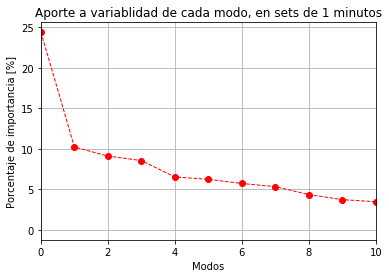

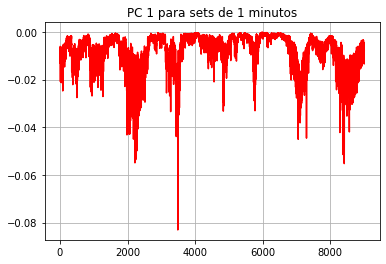

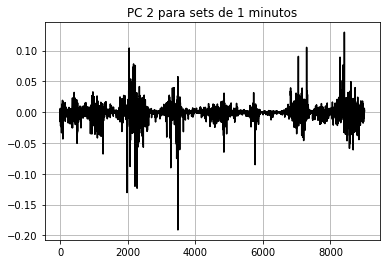

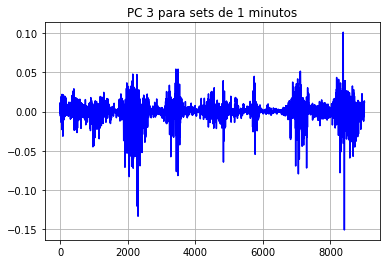

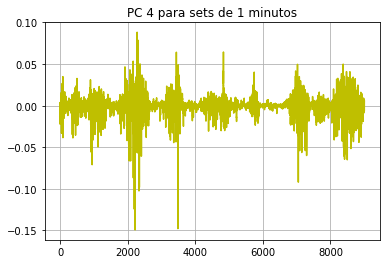

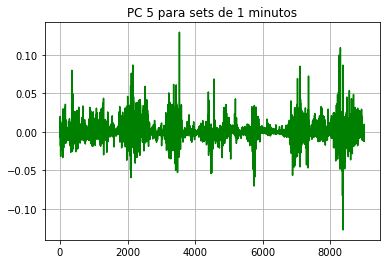

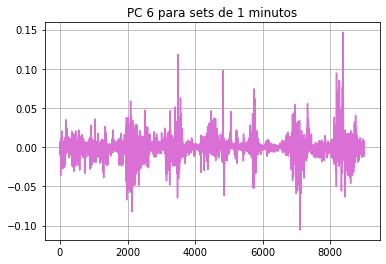

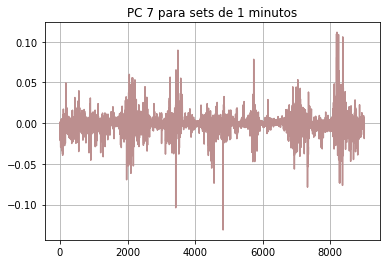

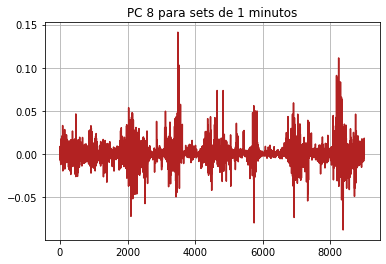

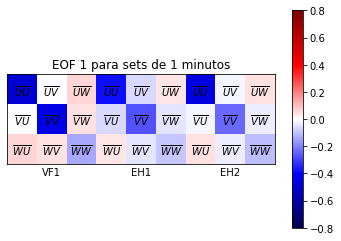

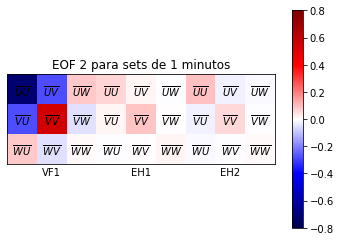

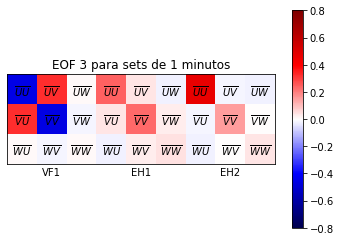

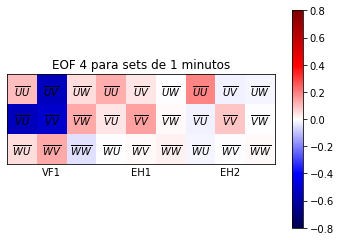

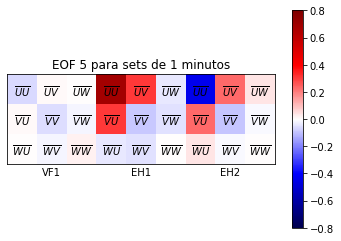

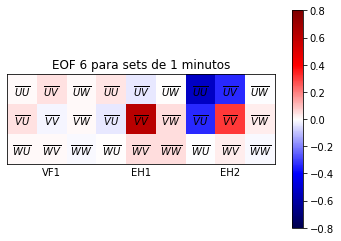

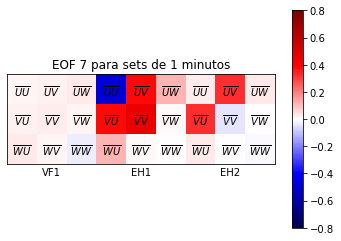

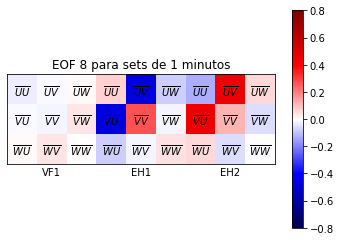

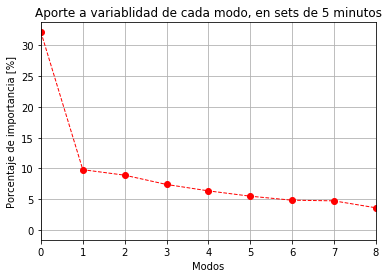

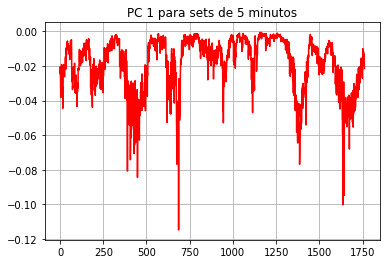

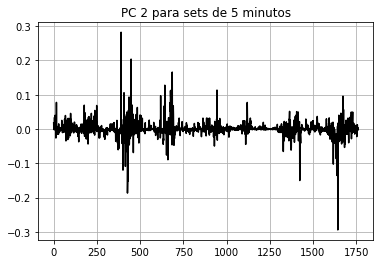

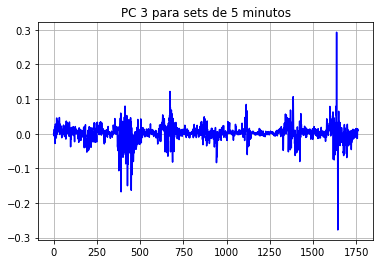

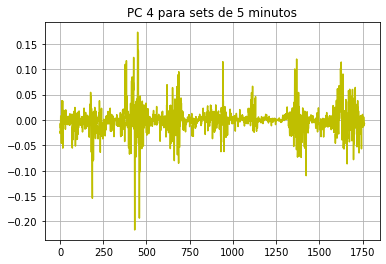

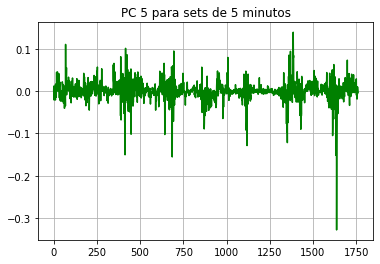

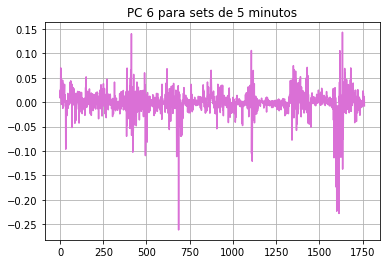

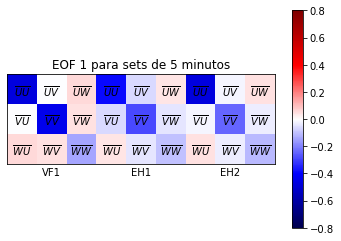

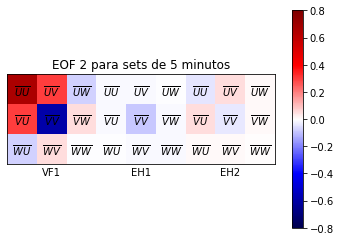

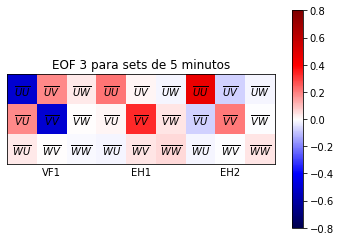

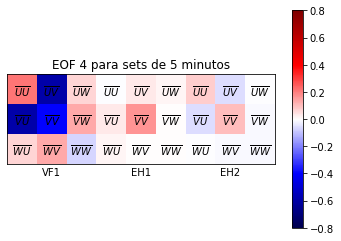

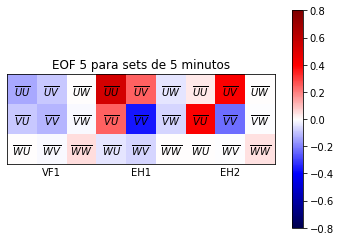

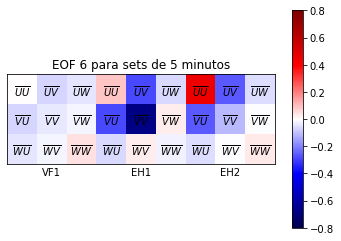

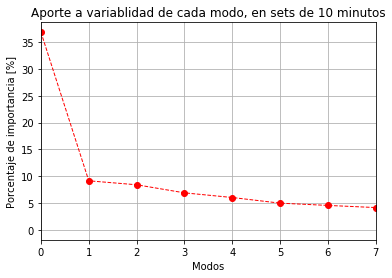

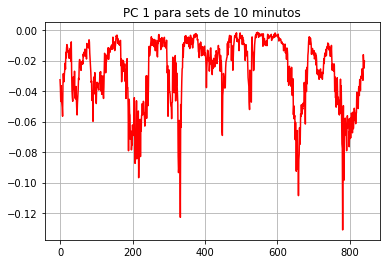

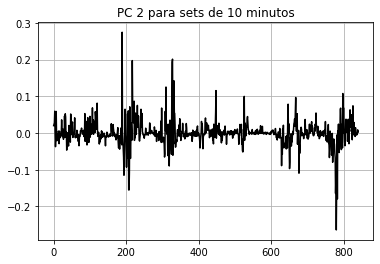

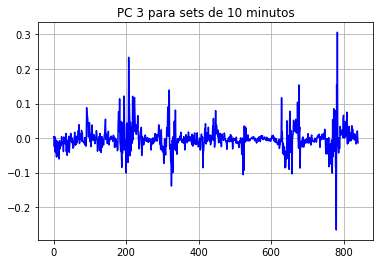

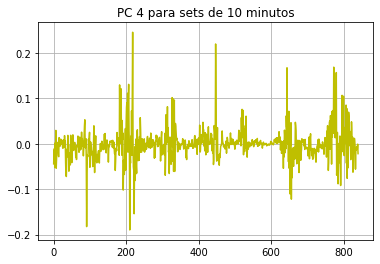

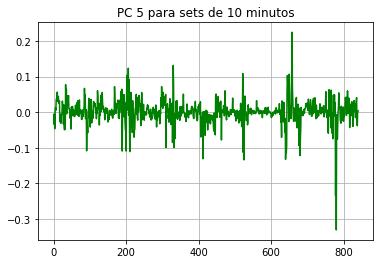

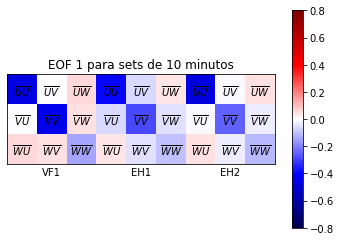

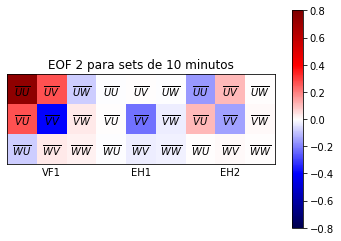

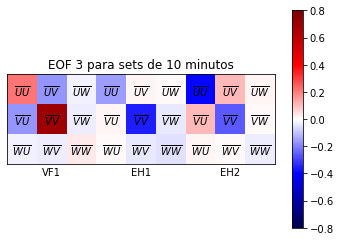

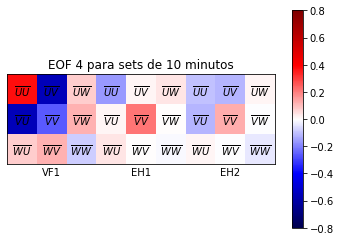

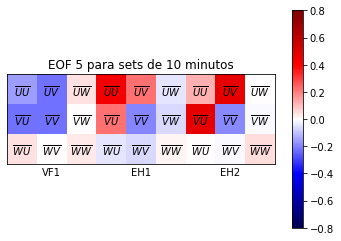

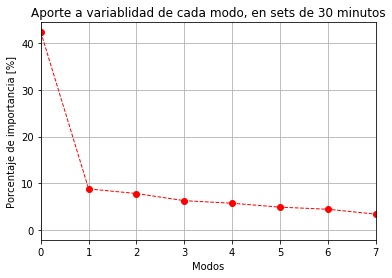

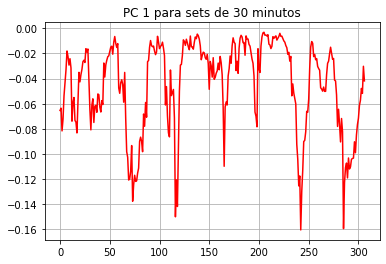

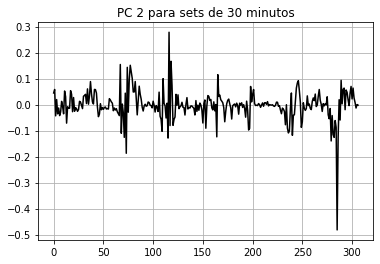

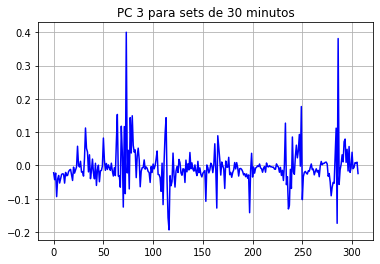

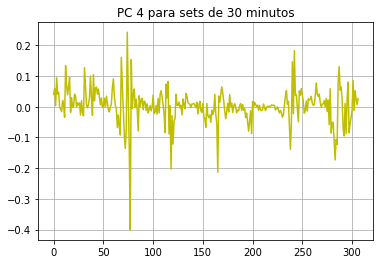

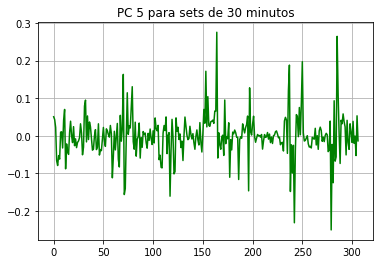

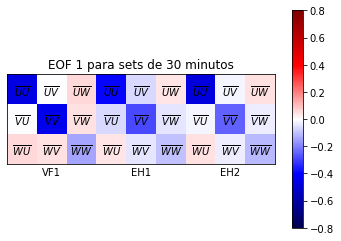

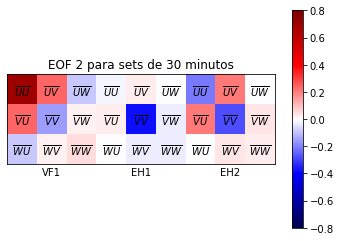

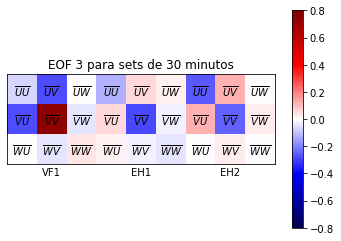

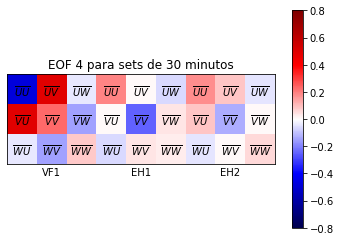

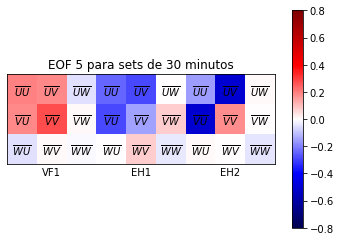

In [304]:
A_total =np.asarray([[A1,A5,A10,A30],[1,5,10,30]])

for s in range(A_total.shape[1]):
    EOFTensorMax(A_total[0,s],A_total[1,s],5,ruta_conj)

In [301]:
print(A1.shape,A5.shape,A10.shape,A30.shape)

(9007, 27) (1762, 27) (841, 27) (307, 27)
